# Caso práctico Fintech 2022 - Data Science - Clasificación

## Dataset: ⚓ Titanic ⛵ 🧊

### **Introdución** 📖

Antes de trabajar con un set de datos ('dataset' de ahora en adelante), es de suma **importancia saber el contexto e incluso la historia** que envuelven los datos. Esto ayuda a **comprender** acerca de lo que significan realmente los datos así como **entender algunas peculiaridades o patrones** que se pueden encontrar en su analysis correspondeinte además de derivar en un tratado más eficiente y elocuente de los datos.



#### **Contexto**
(**FUENTE**: [WIKIPEDIA](https://es.wikipedia.org/wiki/RMS_Titanic#Pel%C3%ADculas))

En Marzo de 1912 se finalizó la construcción de lo que supuso **el transanlántico más grande y lujoso hasta la fecha, el RMS Titanic**. Su inauguración, en Abril de ese mismo año, atrajo a 2208 pasajeros. 

Durante su **viaje inaugural**, el portento de metal chocó contra un gran iceberg en el polo Norte a más de 600 kilómetros de la costa más cercana causando no solo **su hundimiento si no también la defunción de ni más ni menos que 1496 de sus pasajeros**.

En tan solo dos meses, el transantlántico más lujoso y grande hasta la fecha, se convirtió en una de las tragedias más famosas y conocidas a nivel mundial inspirando películas, documentales, etc.


### **Información del dataset**

El dataset que usaremos en esta práctica se trata de un listado de algunos los pasajeros que abordaron el Titanic en Abril de 1912.

El dataset ha sido extraido de una de las [competiciones disponibles en Kaggle](https://www.kaggle.com/c/titanic/overview).

Aprovechamos para recordar la estructura de un dataset convencional, que es anáologo al de las tablas de datos:

*   **Columnas**: También llamadas "variables". Responden a la pregunta "¿Qué datos?". Indican **qué tipo de datos se recogen de los individuos de una muestra** (Filas, a continuación). En este caso las columnas del dataset de interés ostentan estos datos:

  *   **Passengerid**: Asigna un id único e unívoco a cada pasajero. Esto permite identificar a cada pasajero de manera individual.
  *   **Survived**: Variable booleana (solo dos valores): 1, si el pasajero ha sobrevivido el hundimiento del Titanic; 0, si el pasajero ha perecido ante la tragedia.
    * **PClass**: Clase del ticket.
    * **Name**: Nombre del pasajero en cuestión.
    * **Sex**: Género del pasajero.
    * **Age**: Edad del pasajero.
    * **SibSp**: Número de hermanos u cónyuges en el transanlántico.
    * **Parch**: Número de padres o hijos en el transanlántico.
    * **Ticket**: El número de ticket.
    * **Fare**: Tarifa del pasajero.
    * **Cabin**: Número de cabina.
    * **Embarked**: Puerto del que embarca el pasajero. Puede tener los siguientes valores:
     * **C**: Cherbourg.
     * **Q**: Queenstown.
     * **S**: Southampton.


*   **Filas**: También llamadas "instancias". Responden a la pregunta "¿Cuántos datos?". Se trata de los **individuos de una muestra** de los cuales se recogen los valores de las columnas o variables. **En este set de datos cada fila hace referencia a un pasajero**.

El contenido de este notebook está basado en este [ejemplo](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial) disponible en Kaggle.

Vamos a usar el lenguaje de programación [python](https://www.python.org/). Este lenguaje de programación es conocido por su **sencillez** a la hora de escribir código y es **ampliamente usado en el campo de la ciencia de datos**.

También es importante recalcar que vamos a usar una de las librerías más conocidas para trabajar con datos en python, [pandas](https://pandas.pydata.org/docs/). Esta librería nos ofrece una gran colección de métodos preparados que hace mucho **más accesible y fácil el tratamiento de datos estructurados**. 

Empezamos cargando los datos del fichero csv que se ofrece en la práctica. También somos capaces de visualizar algunos de los datos presentes en dataset.

In [1]:
!wget https://raw.githubusercontent.com/JorgeZapa/Fintech2022/main/Classification/titanic_data.csv 

--2022-06-27 17:31:17--  https://raw.githubusercontent.com/JorgeZapa/Fintech2022/main/Classification/titanic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_data.csv’

titanic_data.csv    100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2022-06-27 17:31:17 (5.05 MB/s) - ‘titanic_data.csv’ saved [61194/61194]



In [2]:
#Importamos la librería/s para hacer uso de su código y funciones
#Otras librerías necesarias para la práctica
from IPython.display import Image
from IPython.core.display import HTML 
import pandas as pd

#Leemos el fichero en formato csv
titanic_data = pd.read_csv('/content/titanic_data.csv', dtype = {'PassengerId' : str})
#Visualizamos los datos cargados en memoria
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Analizando** el Dataset

Antes de realizar cualquier tarea de limpieza, preprocesado o modelo sobre los datos, es importante revisarlos y entenderlos con profundidad.

En esta sección vamos a realizar una serie de visualizaciones para poder lograr tal objetivo.

### Tipos de variables

Para poder realizar un análisis adecuado de una variable es indispensable tener en cuenta el **tipo de variable** que queremos tratar. La siguiente imagen muestra los principales categorizaciones en las que podemos clasificar las variables:

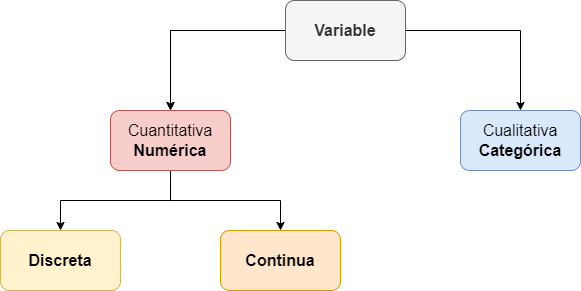

* **Variable continua**: Se dice que es una variable cuyo valor se extrae de una **medición o que puede ostentar infinitos valores**. Algunos ejemplos pueden ser:
  * Altura
  * Peso
  * Temperatura
* **Variable discreta**: Se dice que es una variable cuyo **valor se extrae de un conteo**. Por ejemplo:
 * Número de coches
 * Número de fallos en un examen.

* **Variable categórica**: La variable se **clasifica en una serie de categorías predefinidas**. Son datos qualitativos. Algunos ejemplos:
  * Color de los ojos
  * Método de pago (Métalico o con tarjeta)

### Comprobaciones univarantes
Cuando hablamos de comprobaciones univariantes, estámos básicamente observando **cómo se comporta la variable o columna de manera individual**, sin tener en cuenta el resto.

Entre otros, los objetivos de la realización de estas comprobaciones son:

* Entender **cómo se distribuye la variable** a lo largo del set de datos.
* **Identificar** la presencia de datos **erróneos** o **faltantes** (e.g. edad negativa)
* **Encontrar datos anómalos** (e.g. edad superior a los 120 años)

Atendiendo al tipo de variable se pueden realizar unas visualizaciones u otras para realizar estas comprobaciones.

#### Variables Dicretas y categóricas

Para este grupo de variables vamos a realizar dos tipos de visualizaciones bastante conocidas:

* **Gráfico de barras**: Por cada valor presente en el dataset, el gráfico muestra una **barra rectangular cuya altura es proporcional a la cantidad de valores presentes**.
* **Gráfico circular**: Muestra lo mismo que el gráfico de barras pero como **secciones de un círculo** las cuales son más relativamente grandes cuanto mayor sea la cantidad de valores presentes en el dataset. 

In [3]:
# Función para realizar las principales visualizaciones para las variables CONTINUAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_cont_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  numb_cols = 3
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.histplot(df[column], ax=ax[0], kde= True, color = sns.color_palette()[counter])
    sns.violinplot(x=df[column], ax=ax[1], color = sns.color_palette()[counter])
    sns.boxplot(x=df[column], color = sns.color_palette()[counter], ax=ax[2], width=0.3)
    counter +=1
  #return fig

# Función para realizar las principales visualizaciones para las variables DISCRETAS (columns)
# Seleccionadas del dataset (df) seleccionado
def plot_discret_vars_plots(df, columns, base_fig_height = 10):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

  numb_cols = 2
  numb_rows = len(columns)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)
  
  counter = 0
  for column, ax in zip(columns, axs):
    sns.countplot(data = df, x = column, ax=ax[0], color = sns.color_palette()[counter])
    df.groupby(column).size().plot(kind='pie', ax=ax[1], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
    counter +=1
  #return fig

Using plot grid of [7] rows and [2] cols


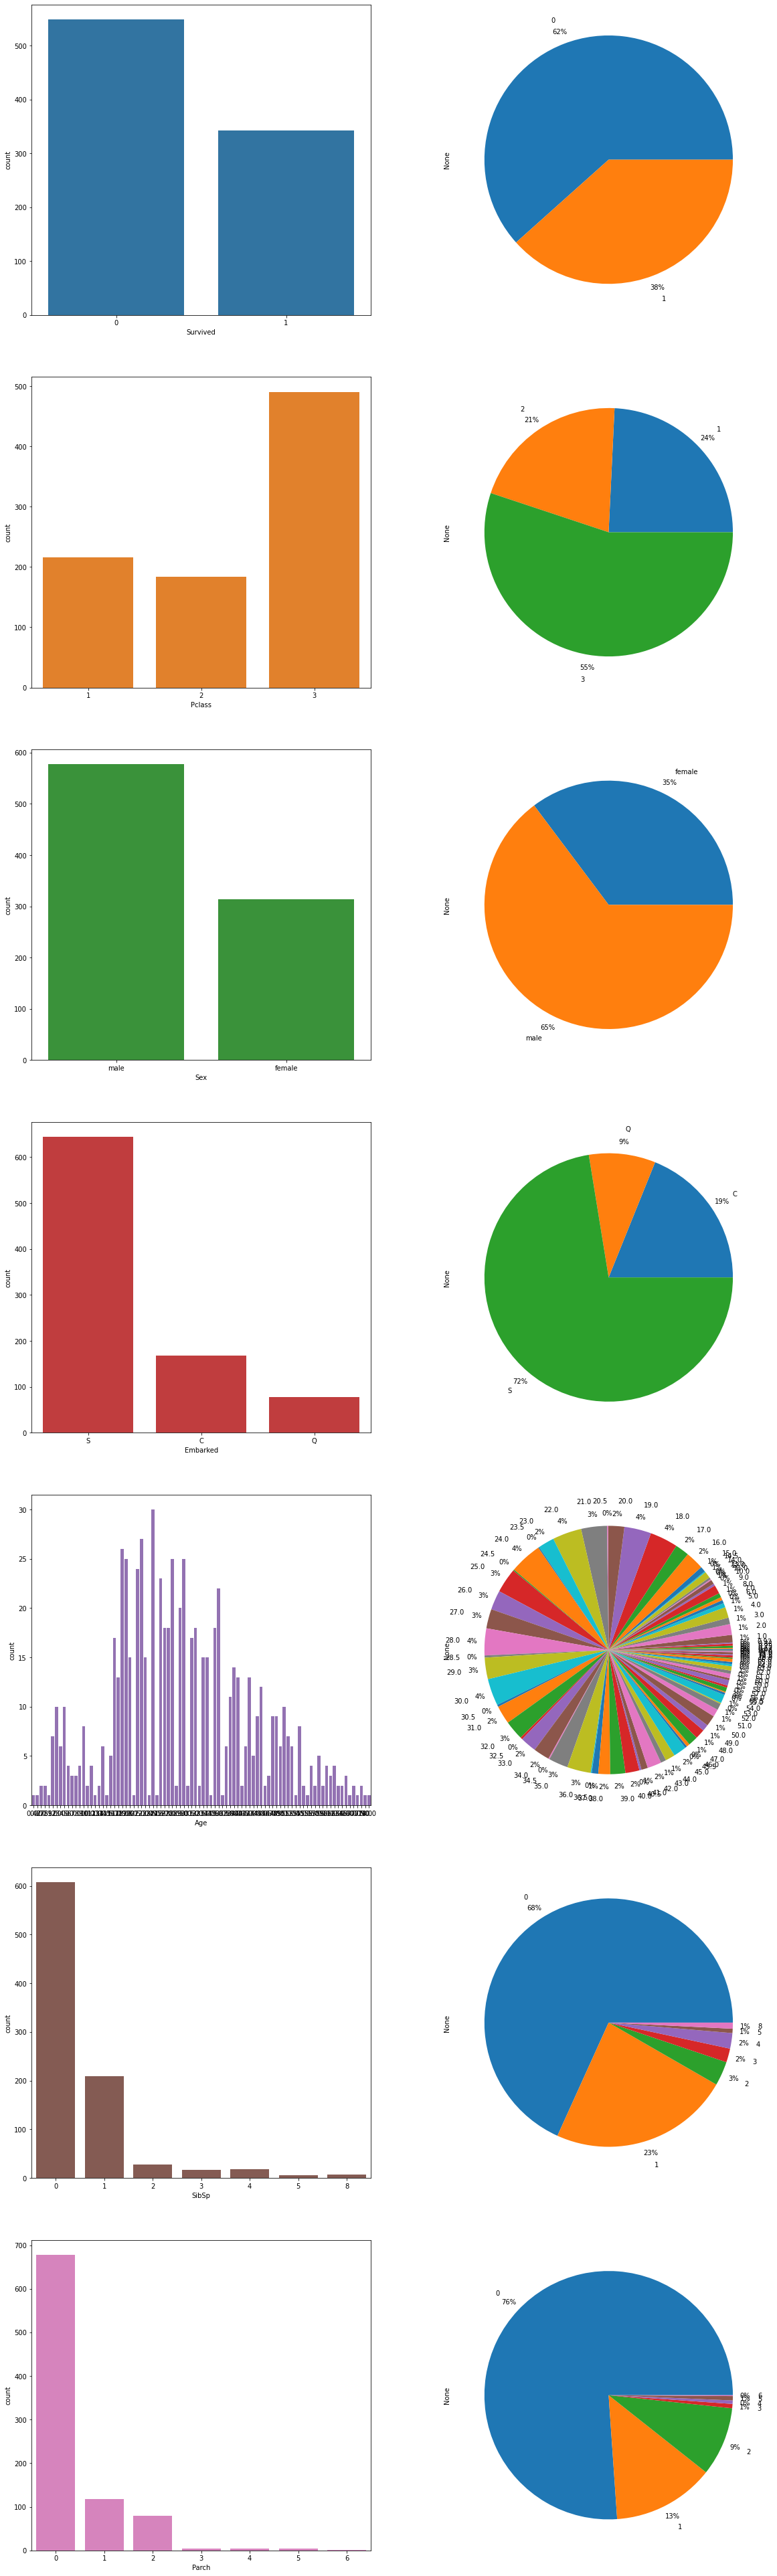

In [4]:
plot_discret_vars_plots(titanic_data, ["Survived", "Pclass", "Sex", "Embarked", 'Age', 'SibSp',	'Parch'])

Todas las variables parecen visualizarse de manera sencilla menos "Age".

A pesar de que por definción **"Age"** debería tratarse como una variable discreta, dada la gran cantidad de valores **vamos a considerarla continua**.

Muchas veces la línea que separa las variables continuas y discretas depende del autor del código o del estudio que se esté haciendo sobre los datos.

#### Variables continuas
Para las variables continuas se puede realizar un análisis univariante mediante el uso de las siguientes visualizaciones:

* **Histograma**: tal y como se explicó al inicio de la sección.
* **Diagrama de violín**: se usa para visualizar la distribución de valores continuos. Su nombre se debe a la forma que suelen presentar, dónde **su forma se vuelve más gruesa dónde los valores variable que se estudia son má frecuentes**.
* **Diagrama de caja**: Muestra fácilmente **cómo se distribuyen los datos en torno a su media, quantiles e incluso ayuda a identificar valores atípicos visualmente**. La siguiente figura muestra un ejemplo de los elementos clave a tener en cuenta para entender este tipo de visualización.

In [5]:
!wget https://i.stack.imgur.com/GqrkS.png

--2022-06-27 17:31:25--  https://i.stack.imgur.com/GqrkS.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.28.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.28.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156799 (153K) [image/png]
Saving to: ‘GqrkS.png’

GqrkS.png           100%[===================>] 153.12K  --.-KB/s    in 0.04s   

2022-06-27 17:31:25 (3.99 MB/s) - ‘GqrkS.png’ saved [156799/156799]



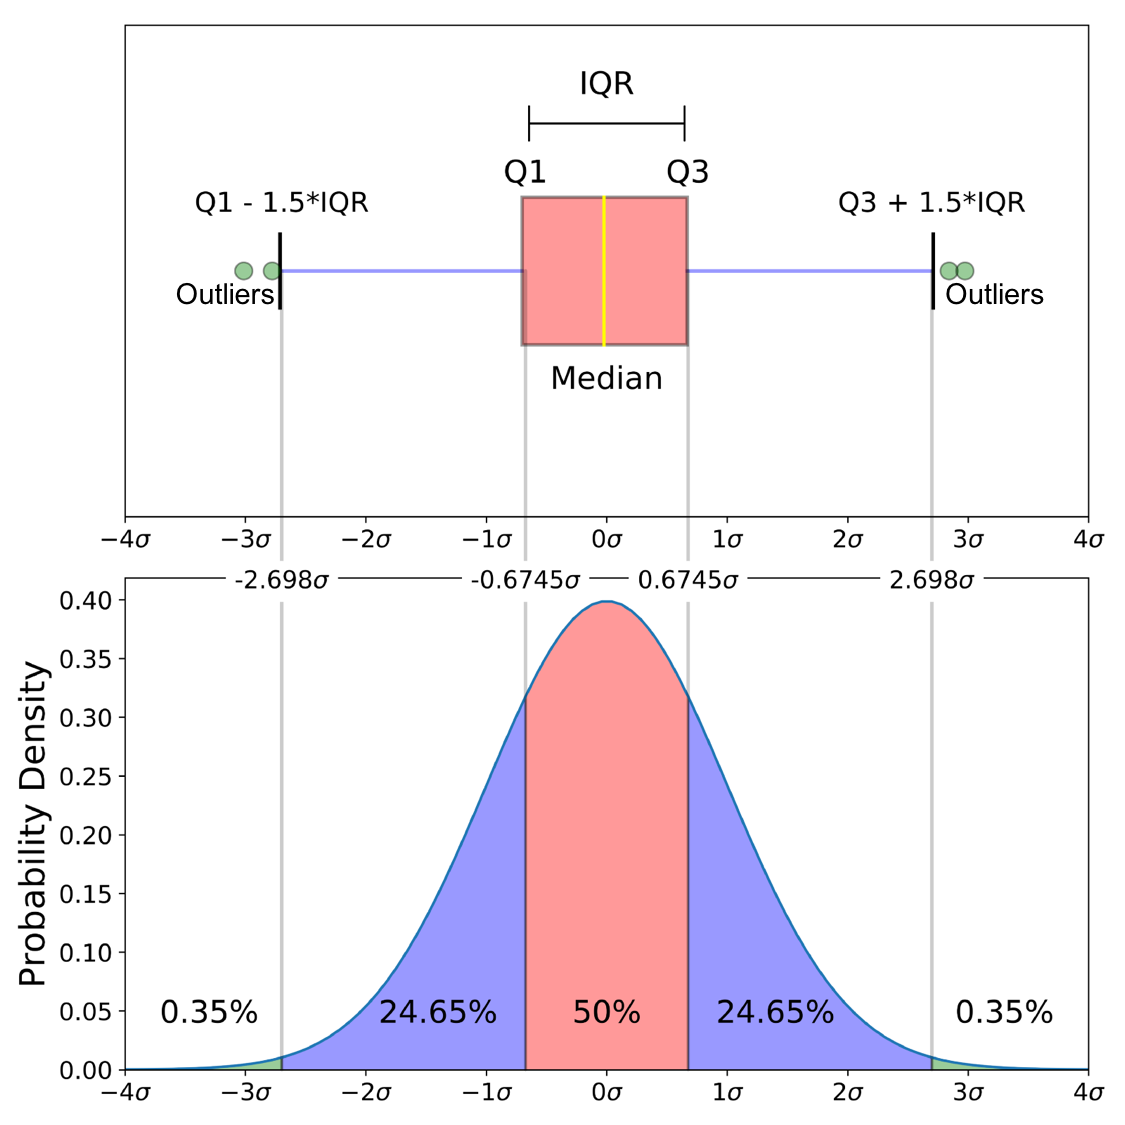

In [6]:
Image('/content/GqrkS.png')

Using plot grid of [2] rows and [3] cols


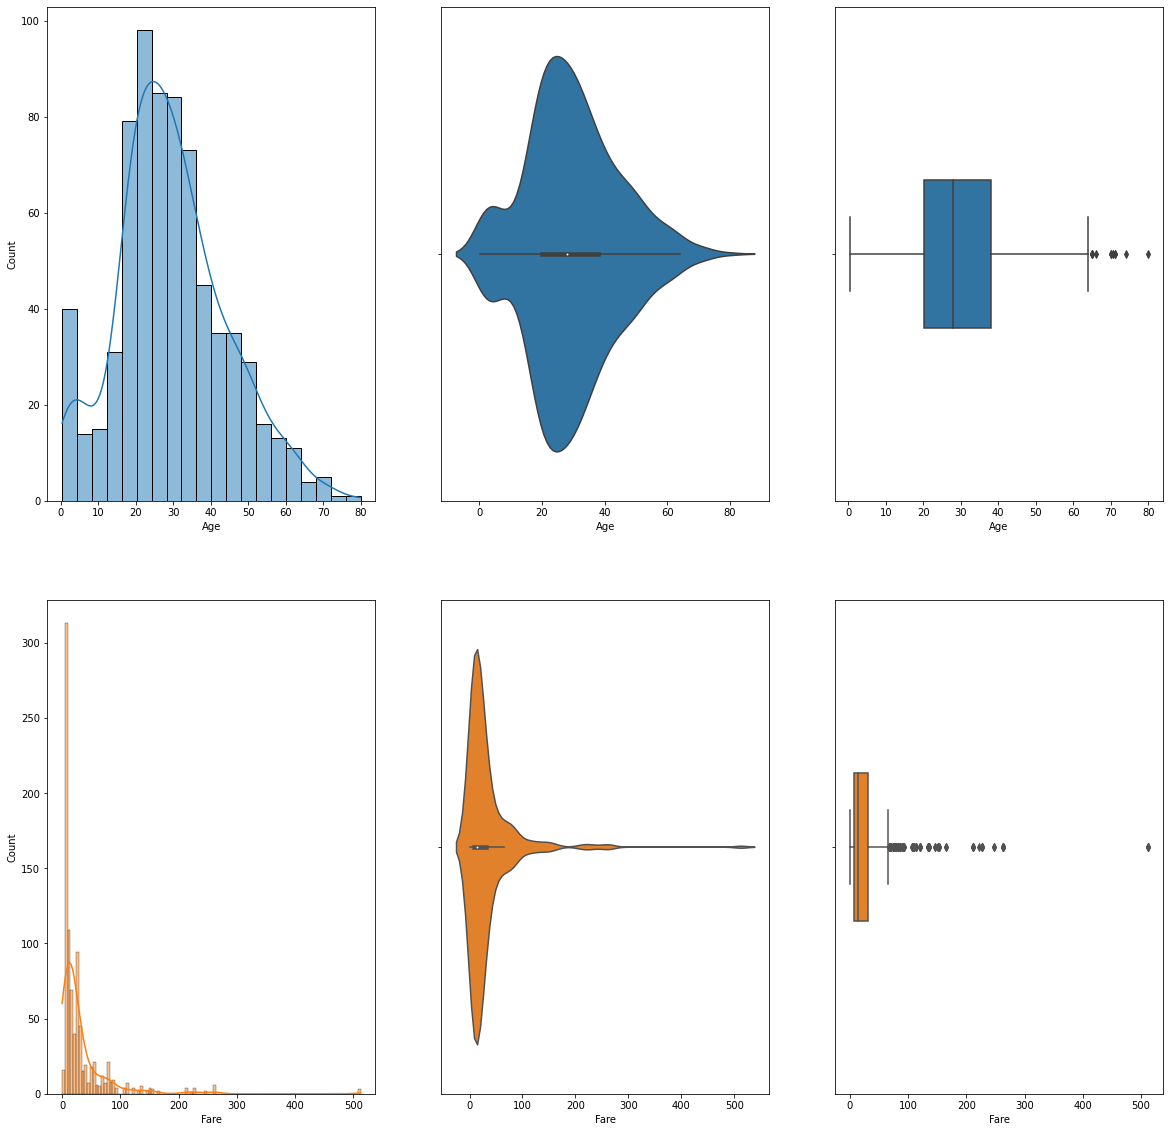

In [7]:
plot_cont_vars_plots(titanic_data, ['Age', 'Fare'])

### Comprobaciones multivariantes

En este caso lo que vamos a **intentar comprobar o visualizar es relaciones entre variables**. Este tipo de estudios son de lo más interesantes ya que nos permiten responder a diferentes tipos de preguntas.

Dado que la **variable más interesante en este estudio es "Survived"** y nos indica qué tripulantes han sobrevivido, vamos a orientar nuestro estudio multivariante en **encontrar la relación de esta variable con el resto**.

In [8]:
# Función que permite calcular el ratio de supervivencia (en porcentaje)
# en relación con otra variable o variables (columns)
def compute_survival_rate_over(df, columns):
  def survival_rate(series):
      return series.sum()/len(series) * 100
  
  aggregation_data =  df.groupby(columns).agg({'Survived' : [survival_rate, 'size']})\
                  .rename(columns = {'Survived': 'Survival_perc', 'size' : 'Numb_records'}).reset_index()

  aggregation_data.columns= columns + ['Survival_perc', 'Numb_records']

  return aggregation_data

In [9]:
# Función que permite visualizar el ratio de supervivencia (en porcentaje)
# en relacion a una serie de variables (columns) DISCRETAS
def plot_survival_rate_discret(df, columns, numb_plot_cols, base_fig_height=6):
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math

  sns.set_theme(style="whitegrid")

  numb_cols = numb_plot_cols
  numb_rows = math.ceil(len(columns)/ numb_plot_cols)
  
  print('Using plot grid of [{0}] rows and [{1}] cols'.format(numb_rows, numb_cols))
  
  fig, axs = plt.subplots(nrows = numb_rows, ncols = numb_cols)
  axs = np.reshape(axs, (numb_rows, numb_cols))
  
  fig.set_figheight(base_fig_height * numb_rows)
  fig.set_figwidth(20)


  for col, ax in zip(columns, axs.flatten()):
    survival_agg_data = compute_survival_rate_over(df, [col])
    sns.barplot(x=col, y='Survival_perc', data=survival_agg_data, ax=ax)
    ax.set_ylim([0, 100])
    for p, x_label in zip(ax.patches, ax.get_xticklabels()):
      num_instances_case = survival_agg_data.loc[survival_agg_data[col] == pd.to_numeric(x_label.get_text(), errors = 'ignore'), 'Numb_records'].values[0]
      ax.annotate("%.0f - [{0}#]".format(num_instances_case) % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='Black', xytext=(0, 20),
                textcoords='offset points')

Vamos a visualizar por cada variable discreta, el **porcentaje de pasajeros que sobrevivieron**.

Using plot grid of [2] rows and [3] cols


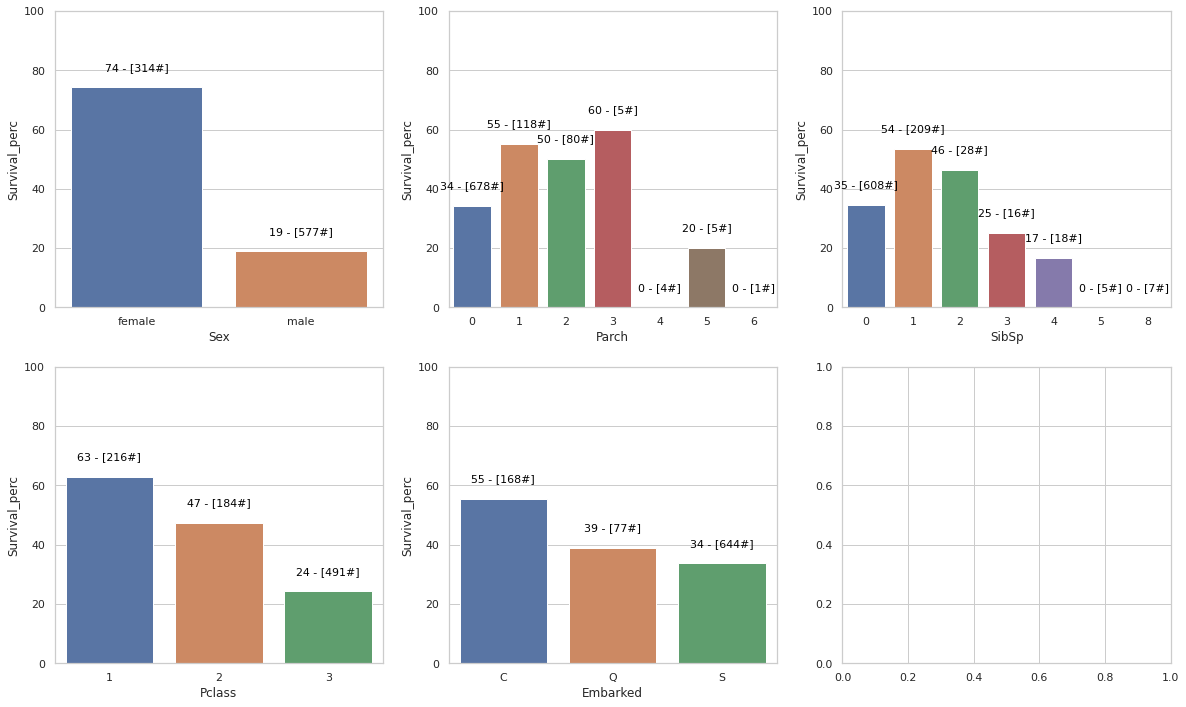

In [10]:
plot_survival_rate_discret(titanic_data, ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked'], numb_plot_cols= 3)

No siempre tenemos que hacer uso de la misma técnología para visualizar datos.

La librería [plotly](https://plotly.com/python/) nos permite realizar visualizaciones con las cuales podemos interactuar para realizar nuestro analisis de datos de manera más eficiente. 

Vamos a usar esta librería para **realizar la misma visualización anterior pero con compontente interactivo**.

In [11]:
import plotly.express as px
interactive_plot_titanic_data = titanic_data.copy()
interactive_plot_titanic_data['Survived'] = interactive_plot_titanic_data.apply(lambda row: 'Survived' if row['Survived'] == 1 else 'Perished', axis = 1)
fig = px.scatter(interactive_plot_titanic_data, x="Age", y="Fare", color="Survived", hover_data = ['Name', 'Sex', 'Age', 'Fare', 'Pclass', 'Survived'],
                 color_discrete_map={
                "Survived": "#00e64d",
                "Perished": "#ff8080"})
fig.show()

## **Limpieza** del dataset

En este caso, tras el análisis de los datos del dataset, no hemos encontrado ningún dato que nos resultara erróneo o demasiado atípico. Lo que sí que debemos comprobar es la presencia de valores faltantes en el dataset.



### Lidiando con los valores faltantes

Cuando rellenamos un **formulario**, en muchas ocasiones se nos presentan **campos que no son obligatorios** y los cuales podemos evitar rellenar. Esto significa que ese valor es decsconocido para el sistema que almacena los resultados de dicho formulario.

Este es el **caso en la mayoría de los datasets**. Es muy posible que nos encontraremos algunas filas en las cuales algunas columnas carecen de datos, su valor es desconocido por diferentes motivos que muchas veces son ajenos a el científico de datos que está tratando los datos.

Vamos a comprobar si en los datos presentes en el listado de tripulantes del titanic, este tipo de dato está presente. 

In [12]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {} - in percentage {}%'.format(col, df[col].isnull().sum(), df[col].isnull().sum()/len(df) * 100))
    print('\n')
    
display_missing(titanic_data)

PassengerId column missing values: 0 - in percentage 0.0%
Survived column missing values: 0 - in percentage 0.0%
Pclass column missing values: 0 - in percentage 0.0%
Name column missing values: 0 - in percentage 0.0%
Sex column missing values: 0 - in percentage 0.0%
Age column missing values: 177 - in percentage 19.865319865319865%
SibSp column missing values: 0 - in percentage 0.0%
Parch column missing values: 0 - in percentage 0.0%
Ticket column missing values: 0 - in percentage 0.0%
Fare column missing values: 0 - in percentage 0.0%
Cabin column missing values: 687 - in percentage 77.10437710437711%
Embarked column missing values: 2 - in percentage 0.22446689113355783%




Como se puede observar en el listado anterior, las únicas columnas que muestran falta de datos son:
* **Age**: con 177 valores faltantes, este dato puede ser de suma importancia para estudios posteriores.
* **Cabin**: con más de un 75% de los pasajeros sin infromación acerca de su cabina asignada esta variable por si misma sirva de poca utilidad.
* **Emarked**: Solamente faltan 2 tripulantes. Sin este valor es posible que no podamos realizar algunos estudios posteriores.


Dicho esto, vamos a intentar rellenar estos datos faltantes como podamos variable por variable.

##### Imputando "Age"

En el caso de las variables continuas, **existe toda una literatura sobre cómo se debe estudiar y rellenar estos datos faltantes** de manera eficaz. En este ejemplo vamos a optar por la medida más simple: **introducir en los valores faltantes la media** de la columna correspondiente con los valores presentes.

In [13]:
#Observemos un ejemplo de pasajero sin edad
titanic_data[titanic_data['PassengerId'].isin(['6'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [14]:
# Comprobamos el valor medio de la columna Age. Este es el valor que se va a imputar en los valores desconocidos.
int(titanic_data['Age'].mean())

29

In [15]:
titanic_data['Age'] = titanic_data['Age'].fillna(int(titanic_data['Age'].mean()))

In [16]:
#Observemos un pasajero (6) que no tenía valor de Age previamente (mirar celdas anteriores)
titanic_data[titanic_data['PassengerId'].isin(['6'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q


#### Imputando "Embarked"
Las variables discretas de este tipo son muy dificiles de rellenar correctamente. **¿Cómo sabemos si un triupante ha embarcado desde Cherbourg, Queenstown o Southampton?**

En algunas ocasiones, los Científicos de Datos hacemos la labor de detectives y, conociendo el contexto del dataset con el que se trabaja, es posible poder, con cierto nivel de certeza, rellenar estos valores.

En el caso de esta variable, echando un vistazo a los triupantes sin esta información podemos prestar atención a su nombre, también presente en el dataset.

In [17]:
#Observemos dos ejemplos, los dos sin información el la variable Embarked
titanic_data[titanic_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Si **buscamos en google accerca de "Mrs. Geogre Nelson (Martha Evelyn)"** se puede encontrar lo siguiente:



> **Mrs Stone** boarded the Titanic in **Southampton** on 10 April 1912 and was travelling in first class **with her maid Amelie Icard**.

Esto quiere decir que sabemos que ambas embarcaron desde Southampton. Rellenaremos estos valores faltantes con el valor "S".

In [18]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

In [19]:
#Comprobamos que ambos tripulantes tienen el valor correcto después de imputar
titanic_data[titanic_data['PassengerId'].isin(['62', '830'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


#### Resultado después del tratamiento de datos faltantes

Después de haber imputado las variables faltantes podemos observar cómo se presentan los daltos faltantes de nuevo:

In [20]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {} - in percentage {}%'.format(col, df[col].isnull().sum(), df[col].isnull().sum()/len(df) * 100))
    print('\n')
    
display_missing(titanic_data)

PassengerId column missing values: 0 - in percentage 0.0%
Survived column missing values: 0 - in percentage 0.0%
Pclass column missing values: 0 - in percentage 0.0%
Name column missing values: 0 - in percentage 0.0%
Sex column missing values: 0 - in percentage 0.0%
Age column missing values: 0 - in percentage 0.0%
SibSp column missing values: 0 - in percentage 0.0%
Parch column missing values: 0 - in percentage 0.0%
Ticket column missing values: 0 - in percentage 0.0%
Fare column missing values: 0 - in percentage 0.0%
Cabin column missing values: 687 - in percentage 77.10437710437711%
Embarked column missing values: 0 - in percentage 0.0%




## **Preprocesado** - Añadiendo nuevas columnas ("Feature engineering")

Uno de los pasos más importantes a la hora de preparar los datos para ser empleados en un problema de predicción con machine learning es **añadir columnas deducidas de otras**. No solo añaden más información al modelo predictivo a usar, si no que pueden ser columnas clave y puedes mejorarlo con creces.

En este apartado vamos a **deducir unas cuantas columnas que pueden ser de utilidad al modelo que vamos a construir posteriormente**.

#### Family size

El objetivo de esta variable es **representar el tamaño de la familia de cada triupante**. Es muy posible que el hecho de ser un miembro de una gran familia facilitara que alguno de los miembros de estos tuvieran más oportunidades de sobrevivir.

Calculamos el valor de esta variable para cada tripulante de la siguiente manera:



```
FamilySize = Parch (nº padres o hijos)  + SibSp (nº hermanos o cónyuges) + 1 (El triupante en cuestión es parte de la familia)
```



In [21]:
titanic_data['FamilySize'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


Observemos cómo se comporta esta nueva variable con respecto al porcentaje de supervivencia

Using plot grid of [1] rows and [3] cols


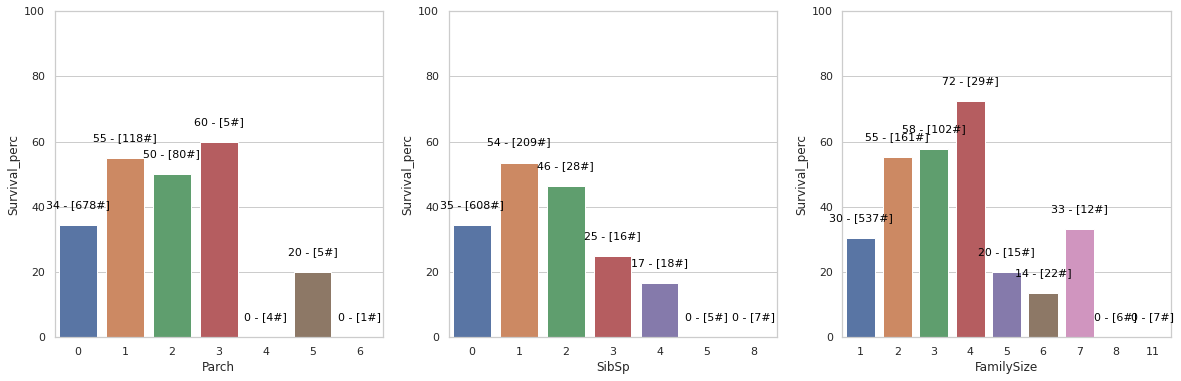

In [22]:
plot_survival_rate_discret(titanic_data, ['Parch', 'SibSp', 'FamilySize'], numb_plot_cols= 3)

Según los datos, es más **probable que un tripulante sobreviva al hundimiento del titanic si tiene 4 o menos familiares a bordo, incuyéndose a si mismo**.

#### Title

Otra variable que puede ser interesante para poder predecir si un tripulante sobrevive o no puede ser el **título que ostenta el tripulante**.

En la **variable "name" se incluye el título de los tripulantes**. La idea es extraer de ese campo de texto el título que le corresponde a cada individuo.

In [23]:
titanic_data['Title'] = titanic_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


Vamos a visualizar cuántos títulos hemos encontrado a lo largo de los 1309 tripulantes.

Using plot grid of [1] rows and [2] cols


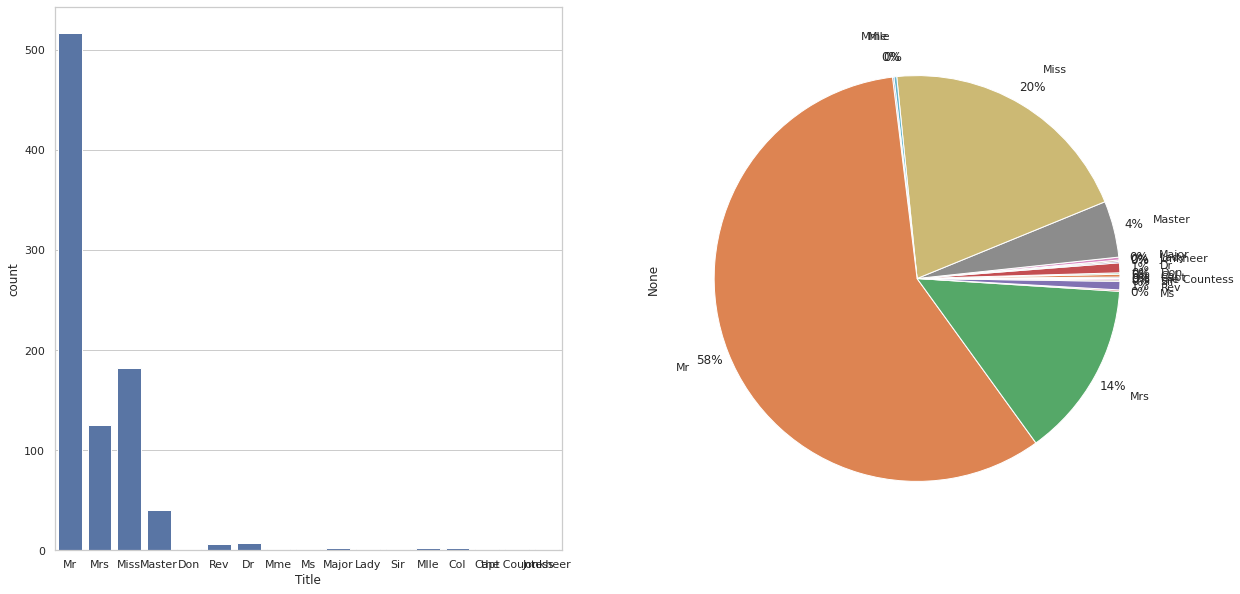

In [24]:
plot_discret_vars_plots(titanic_data, ['Title'])

Como se puede observar, hay **demasiada variedad de títulos**.

Vamos a **agruparlos en títulos más sencillos** para poder facilitar su comprension y su posterior uso de la siguiente manera:
* **Mr**: este grupo lo vamos a dejar tal cual está.
* **Miss/Mrs/Ms**: Este grupo tiene todos los títulos para referirnos al género femenino de manera parecido al "Mr".
* **Master**: Individuos del género masculino los cuales son demsiado jóvenes como para ser referidos como "Mr".
* **Dr/Military/Noble/Clergy**: Este grupo sería como el grupo misceláneo en el cual entran el resto de títulos.

In [25]:
titanic_data['Title'] = titanic_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic_data['Title'] = titanic_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Miss/Mrs/Ms
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss/Mrs/Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Miss/Mrs/Ms
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Dr/Military/Noble/Clergy
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss/Mrs/Ms
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,4,Miss/Mrs/Ms
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


Después de realizar esta conversión observamos como los grupos están mucho mejor definidos y distribuidos para su posterior estudio.

Using plot grid of [1] rows and [2] cols


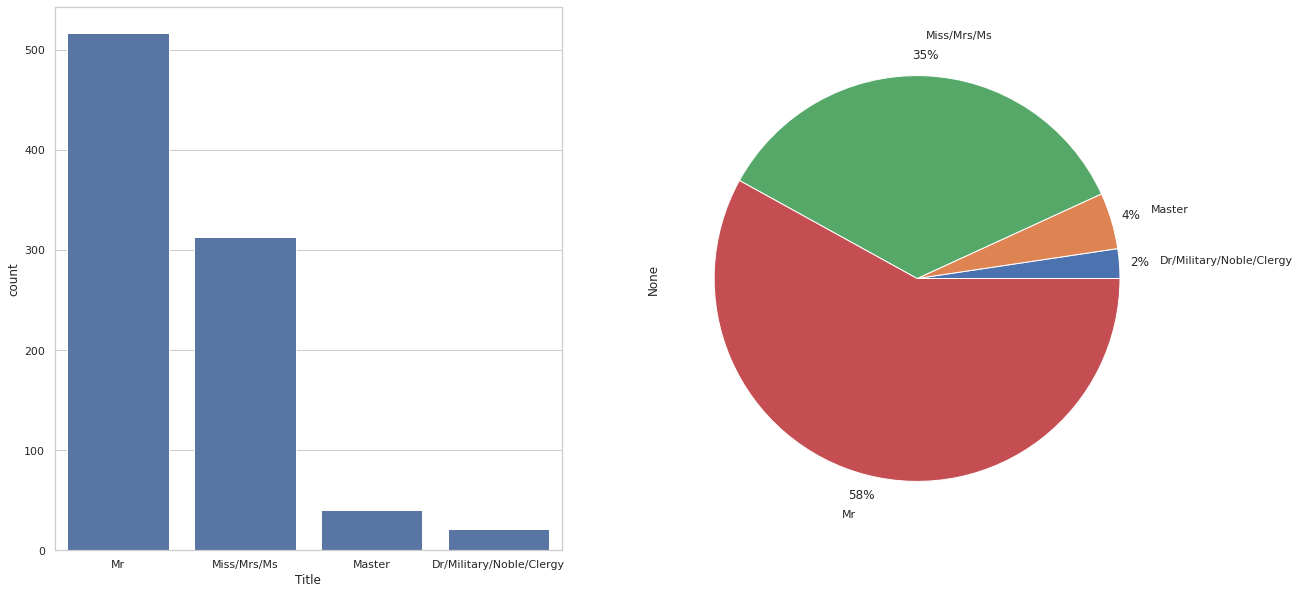

In [26]:
plot_discret_vars_plots(titanic_data, ['Title'])

Ahora visualicemos **como influye esta nueva variable a probabilidad de supervivencia** en este desastre.

Using plot grid of [1] rows and [1] cols


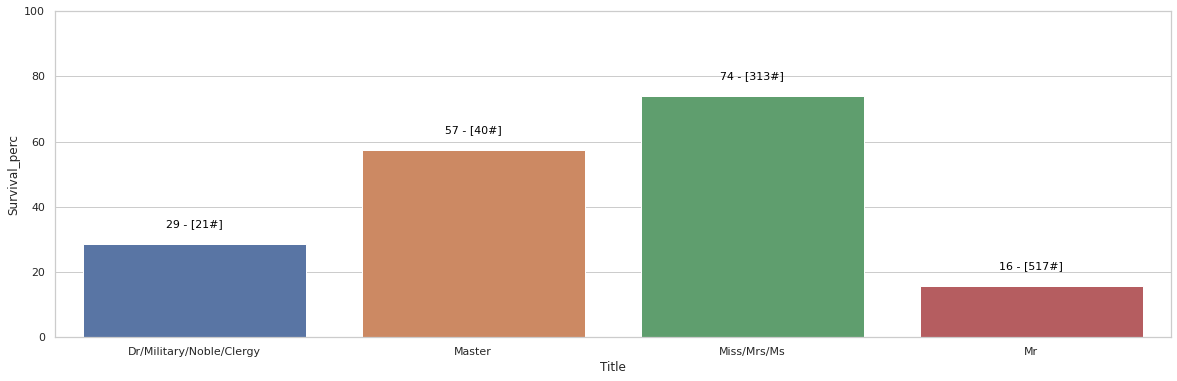

In [27]:
plot_survival_rate_discret(titanic_data, ['Title'], numb_plot_cols= 1)

## **Modelado** - Prediciendo la supervivencia

Una vez tenemos el dataset limpio, y preprocesado, debemos **continuar con las labores de preprocesado para poder alimentarlo al modelo o modelos que deseemos**.

Recordamos que en este ejemplo lo que queremos **predecir es si un tripulante, una vez conocidos sus datos, sobrevivirá o no al desastre del titanic**. La variable a predecir ("Survived") se trata de una variable discreta booleana (solo tiene dos valores posibles "0" o "1").

Se pueden usar una infinitud de modelos para predecir el valor de esta variable, pero por simplicidad **vamos a usar tres de los modelos más conocidos**:

* **Arbol de decisión**.
* **Random Forest**.

Ahora que conocemos los modelos a usar, tenemos que:
1. **Selección preliminar de variables**.
2. **Transformar los datos** de forma de que sean **válidos para el modelo**.
2. **Estudiando la correlación** entre variables.
3. **Definir el modelo**.
4. **Entrenar el modelo**.
5. **Poner a prueba la eficacia del modelo**.

Vamos a seguir estos pasos uno a uno.

### Selección preliminar de variables

En muchos casos, no hace falta hacer uso de algoritmos para saber qué variables nos pueden resultar útiles para predecir una variable (de todas formas existen algoritmos para seleccionar variables). En este paso vamos a **eliminar de los datos aquellas variables que no aportan ningúna información importante a la hora de predecir si un triuplante sobrevivirá o no a la tragedia acontecida en el Titanic**.

Estas variables son:
* **PassengerId**: El identificador del tripulante es único y no nos aporta información acerca de la supervivencia del triupulante.
* **Name**: Por la misma razón que la variable anterior.
* **Ticket**: Por la misma razón que la variable anterior.
* **Cabin**: La cabina del triupulante puede ser interesante para saber acerca de su probabilidad de supervivencia. Pero tal y como hemos visto en el apartado "**Lidiando con datos faltantes**" esta variable consta de muchos valores faltantes como para que nos sea realmente útil.

In [28]:
model_titanic_data = titanic_data.copy()
model_titanic_data = model_titanic_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'])
model_titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,S,2,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Miss/Mrs/Ms
2,1,3,female,26.0,0,0,7.9250,S,1,Miss/Mrs/Ms
3,1,1,female,35.0,1,0,53.1000,S,2,Miss/Mrs/Ms
4,0,3,male,35.0,0,0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,Dr/Military/Noble/Clergy
887,1,1,female,19.0,0,0,30.0000,S,1,Miss/Mrs/Ms
888,0,3,female,29.0,1,2,23.4500,S,4,Miss/Mrs/Ms
889,1,1,male,26.0,0,0,30.0000,C,1,Mr


###Transformación de variables para el modelo

Dado que los **modelos que vamos a usar trabajan con datos numéricos, debemos transformar las variables categóricas ("Sex" y "Title") a una representación de estas a una variable numérica**.

La primera solución que nos llega a la cabeza es asignar un número entero a cada valor. Pero en este caso si en la variable "Title" el valor "Mr" le asignaramos un 1 y a "Master" un 3, ¿significa esto que Master es 3 veces más que mister?

Para evitar este problema, se hace otro **tipo de representación que se llama "One Hot Encoder"**. La idea es crear una columna por cada posible valor de la columna original en la que se indique si el valor de la columna era ese u otro.

Se ilustra de manera más comprensible en la siguiente figura, dónde transformamos una variable discreta ("Color") a una representación continua donde cada nueva columna indica si esa fila tiene un color específico presente:

In [29]:
!wget https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png

--2022-06-27 17:31:40--  https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15559 (15K) [image/png]
Saving to: ‘1*ggtP4a5YaRx6l09KQaYOnw.png’

1*ggtP4a5YaRx6l09KQ 100%[===================>]  15.19K  --.-KB/s    in 0s      

2022-06-27 17:31:40 (74.7 MB/s) - ‘1*ggtP4a5YaRx6l09KQaYOnw.png’ saved [15559/15559]



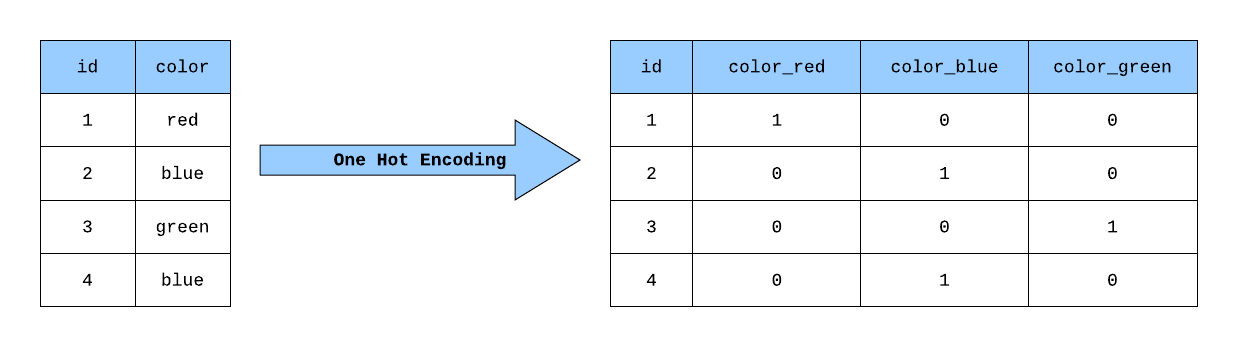

In [30]:
Image(filename= "/content/1*ggtP4a5YaRx6l09KQaYOnw.png")

Ahora vamos a aplicar "One Hot Encoding" a nuestras variables categóricas para el modelo:

* **Embarked**
* **Sex**
* **Title**

In [31]:
model_titanic_data = pd.get_dummies(model_titanic_data, columns=['Embarked', 'Sex', 'Title'])
model_titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,0,3,22.0,1,0,7.2500,2,0,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,2,1,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,2,0,0,1,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1,0,1,1,0,0,0
887,1,1,19.0,0,0,30.0000,1,0,0,1,1,0,0,0,1,0
888,0,3,29.0,1,2,23.4500,4,0,0,1,1,0,0,0,1,0
889,1,1,26.0,0,0,30.0000,1,1,0,0,0,1,0,0,0,1


### Estudiando la correlación entre variables

Para seleccionar variables **numéricas**, podemos hacer uso de una **matriz de correlación**.

La matríz de correlación calcula si existe una relación numérica entre un par de variables (X e Y). Más concretamente, el método de correlación que vamos a usar es el "*Pearson Correlation Coeficcient*", se puede consultar más información en [wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). 

Lo más relevante para este caso de estudio es entender lo que significa el resultado de la matriz de correlación:
* **Correlación positiva (valor cercano a 1)**: Denota que cuando la variable **X se incrementa**, **también** lo suele hacer la **variable Y**.
* **Correlación neutra (valor cercano a 0)**: Denota que **no existe prácticamnete ningúna relacíon numérica** entre ambas variables X e Y.
* **Correlación negativa (valor cercano a -1)**: Denota que cuando la variable **X incrementa su valor**, la **variable Y suele disminuirse**.

Veamos un ejemplo con las variables numéricas de nuestro dataset:

In [32]:
# Primero calculamos la matríz de correlación
titanic_data_corr = model_titanic_data.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307,0.016639,0.168240,0.003650,-0.149683,0.543351,-0.543351,-0.031348,0.085221,0.540769,-0.549199
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500,0.065997,-0.243292,0.221009,0.074053,-0.131900,0.131900,-0.172486,0.082081,-0.128315,0.142698
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706,-0.247402,0.031303,-0.021093,-0.014149,-0.082949,0.082949,0.187400,-0.376027,-0.086526,0.183864
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651,0.890712,-0.059528,-0.026354,0.068734,0.114631,-0.114631,-0.026738,0.349559,0.115830,-0.250489
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225,0.783111,-0.011069,-0.081228,0.060814,0.245489,-0.245489,-0.055225,0.267344,0.246782,-0.333905
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000,0.217138,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.007823,0.010908,0.182763,-0.183766
FamilySize,0.016639,0.065997,-0.247402,0.890712,0.783111,0.217138,1.000000,-0.046215,-0.058592,0.077359,0.200988,-0.200988,-0.045864,0.372472,0.202454,-0.338014
Embarked_C,0.168240,-0.243292,0.031303,-0.059528,-0.011069,0.269335,-0.046215,1.000000,-0.148258,-0.782742,0.082853,-0.082853,0.019678,-0.035225,0.084047,-0.072567
Embarked_Q,0.003650,0.221009,-0.021093,-0.026354,-0.081228,-0.117216,-0.058592,-0.148258,1.000000,-0.499421,0.074115,-0.074115,0.004876,0.010478,0.074892,-0.078338
Embarked_S,-0.149683,0.074053,-0.014149,0.068734,0.060814,-0.162184,0.077359,-0.782742,-0.499421,1.000000,-0.119224,0.119224,-0.020307,0.024264,-0.120759,0.112870


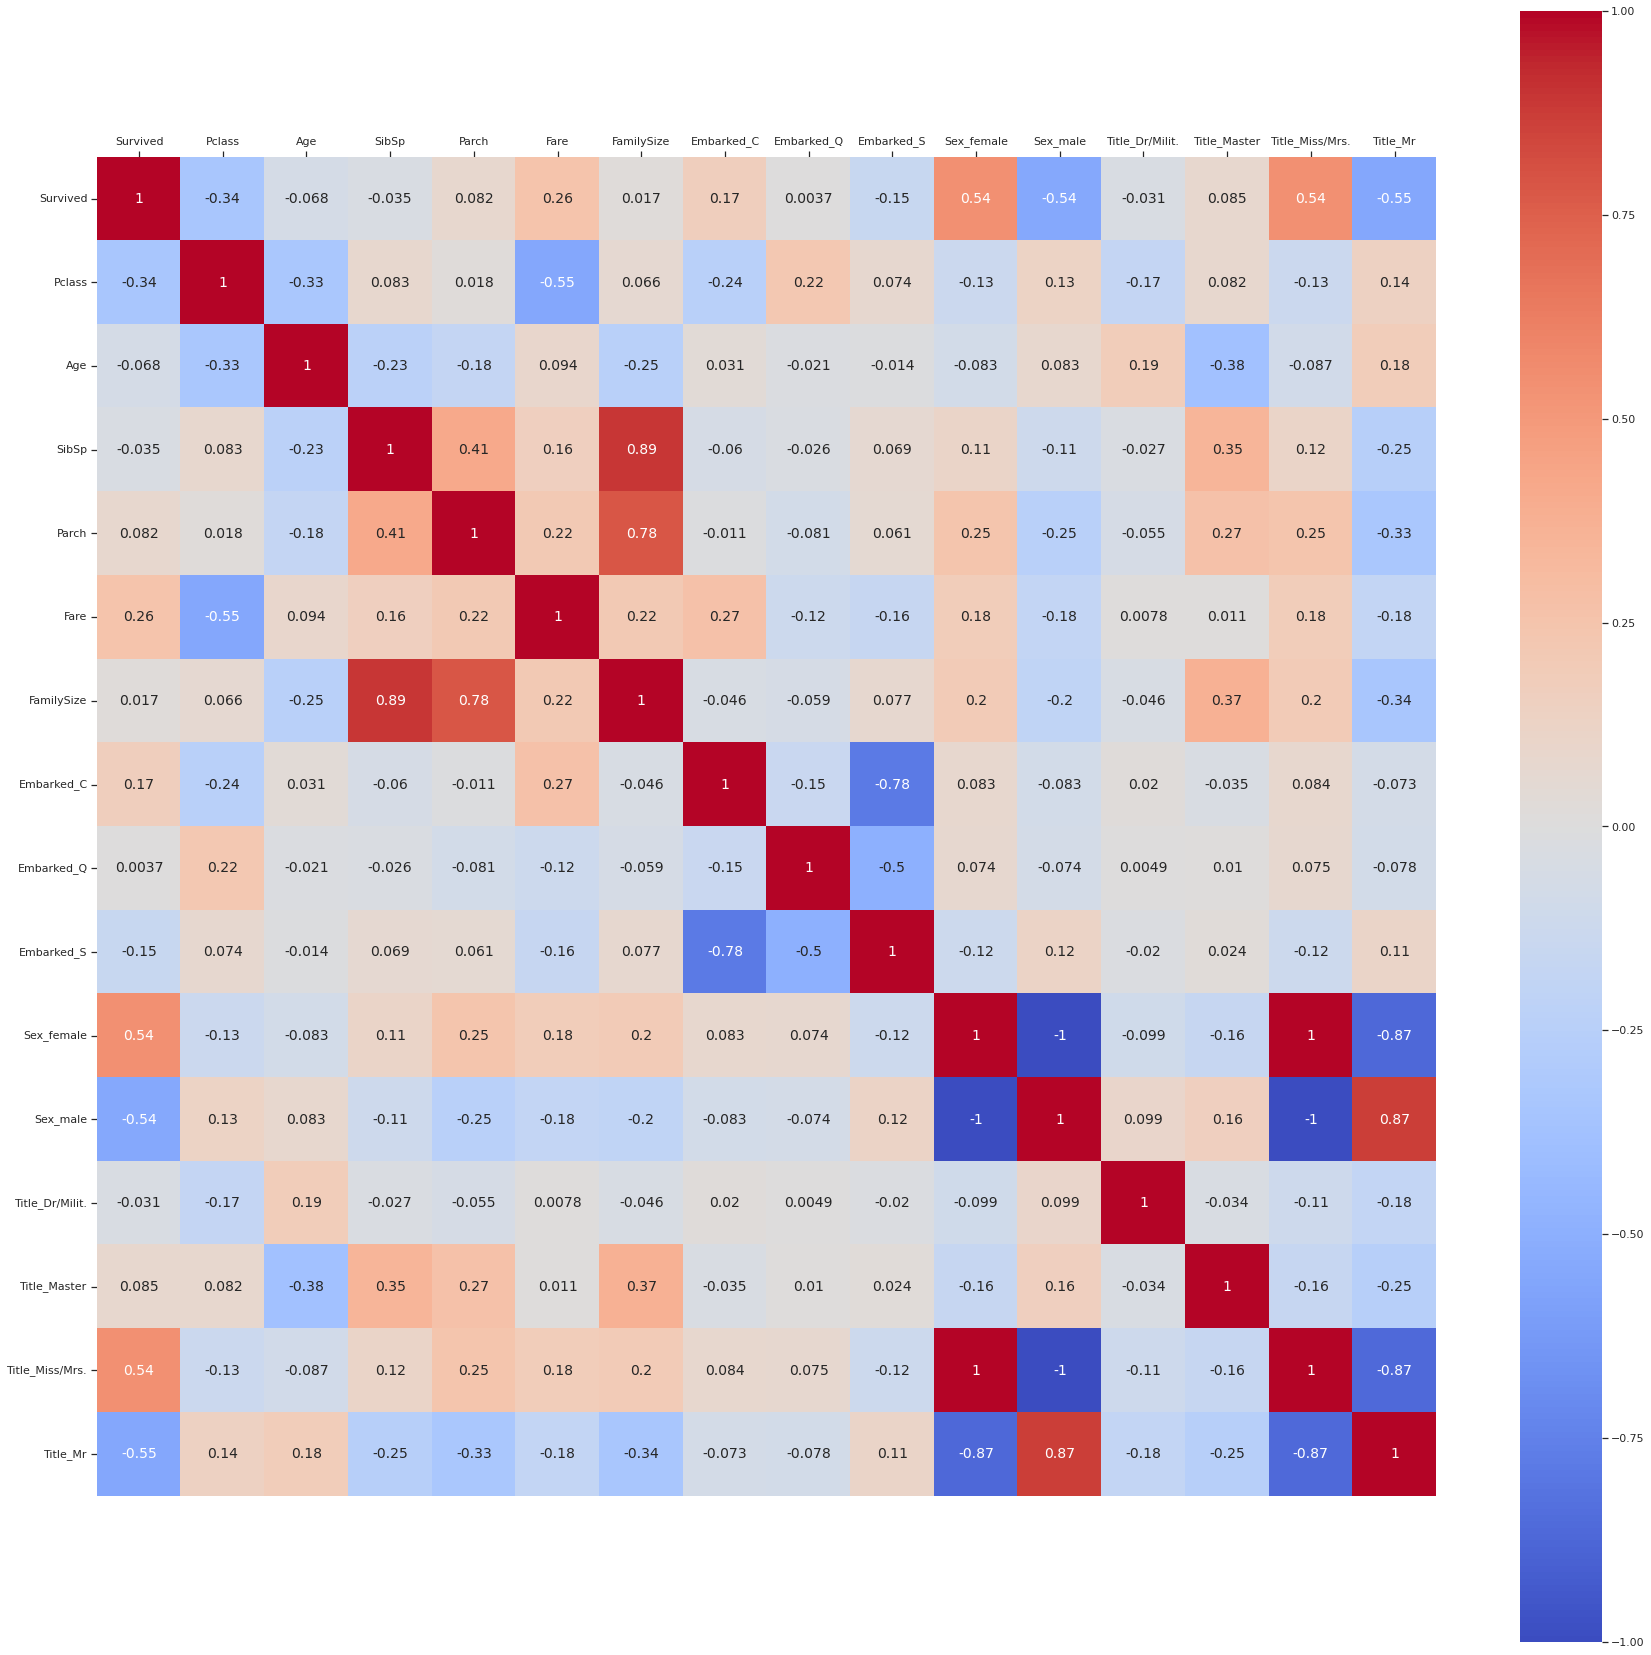

In [33]:
def plot_correlation_matrix(corr_matrix):

  def shorten_big_col_name(col_name):
    if len(col_name)>15:
      return col_name[0:14] + '.'
    else:
      return col_name


  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import math

  fig, ax = plt.subplots(nrows=1, figsize=(30, 30))
  sns.heatmap(corr_matrix, ax=ax, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

  ax.xaxis.tick_top()
  shorten_x_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_xticklabels()]
  ax.set_xticklabels(shorten_x_labels)

  ax.xaxis.set_label_position('top') 
  ax.yaxis.tick_left()
  shorten_y_labels = [shorten_big_col_name(item.get_text()) for item in ax.get_yticklabels()]
  ax.set_yticklabels(shorten_y_labels)
  

plot_correlation_matrix(titanic_data_corr)

In [34]:
corr_ranking = titanic_data_corr.abs().unstack().sort_values(kind="quicksort", ascending=False)\
                            .reset_index().rename(columns={'level_0' : 'variable_X', 'level_1': 'variable_Y', 0 : 'Corr'})
corr_ranking.drop(corr_ranking.iloc[1::2].index)[corr_ranking['Corr'] <1].head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,variable_X,variable_Y,Corr
16,Sex_male,Sex_female,1.000000
18,Title_Miss/Mrs/Ms,Sex_male,0.997542
20,Sex_female,Title_Miss/Mrs/Ms,0.997542
22,FamilySize,SibSp,0.890712
24,Title_Mr,Sex_male,0.867334
26,Title_Mr,Sex_female,0.867334
28,Title_Miss/Mrs/Ms,Title_Mr,0.865202
30,FamilySize,Parch,0.783111
32,Embarked_S,Embarked_C,0.782742
34,Pclass,Fare,0.549500


In [35]:
corr_ranking.drop(corr_ranking.iloc[1::2].index)[corr_ranking['Corr'] <1].tail(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,variable_X,variable_Y,Corr
216,Survived,SibSp,0.035322
218,Embarked_C,Title_Master,0.035225
220,Title_Dr/Military/Noble/Clergy,Title_Master,0.033683
222,Survived,Title_Dr/Military/Noble/Clergy,0.031348
224,Age,Embarked_C,0.031303
226,SibSp,Title_Dr/Military/Noble/Clergy,0.026738
228,SibSp,Embarked_Q,0.026354
230,Title_Master,Embarked_S,0.024264
232,Age,Embarked_Q,0.021093
234,Embarked_S,Title_Dr/Military/Noble/Clergy,0.020307


### Dividiendo los datos para el entrenamiento

Para **poder entrenar y evaular el modelo** de manera efectiva hay que **realizar las siguientes divisiones** tal y como se muestra en el siguiente diagrama:

* Separar las variables **predictoras** de las **objetivo**.

* Separar el set de **entrenamiento (train)** y de **prueba (test)**.

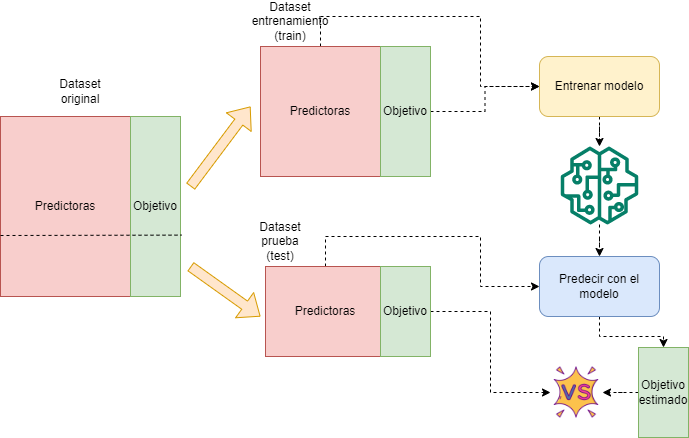

#### Separar las variables en Predictoras y objetivo

Dicho esto, vamos a realizar todas las divisiones necesarias, primero vamos a separar las variables predictoras y las objetivo:


* **Predictoras**: **variables usadas para predecir el valor de otra u otras variables (objetivo)**. En nuestro caso se trata de todas las variables excepto "Survived", vamos a usarlas para intentar predecir dicha variable.

* **Objetivo**: **variable o variables las cual queremos predecir a través de los valores de las predictoras**. En nuestro caso se trata de la variable "Survived".

In [36]:
datos_predictores = model_titanic_data.drop(columns=['Survived'])
datos_predictores

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr
0,3,22.0,1,0,7.2500,2,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,2,1,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,1,0,0,0,1,0
3,1,35.0,1,0,53.1000,2,0,0,1,1,0,0,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1,0,1,1,0,0,0
887,1,19.0,0,0,30.0000,1,0,0,1,1,0,0,0,1,0
888,3,29.0,1,2,23.4500,4,0,0,1,1,0,0,0,1,0
889,1,26.0,0,0,30.0000,1,1,0,0,0,1,0,0,0,1


In [37]:
datos_objetivo = model_titanic_data[['Survived']]
datos_objetivo

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


#### Preparar set de *train* y *test*

En este paso dividimos el dataset "Horizontalmente", con **dos grupos de filas diferentes** (en nuestro caso serían dos grupos de pasajeros diferentes):

* **Subset train**: Este subset se va a usar para entrenar el modelo.
* **Subset test**: Este subset se usará para poner a prueba el modelo.

La realización de esta división es esencial para **evitar y detectar** que el modelo no sufra de lo que se llama **"overfitting"** ("sobreajuste" en español):

A modo de **metáfora**, imaginemos que estamos **estudiando para un examen**, entrenamos para este con muchas **preguntas de exámenes de otros años (set de train)** mientras que el **día del examen las preguntas serán diferentes**, para ver si en realidad habéis entendido el conteido del temario adecuadamente **(set de test)**. **Si usáramos en el examen de verdad preguntas de años enteriores con las que se ha entrenado el resultado de este examen no sería honesto**.

Vamos a proceder a realizar esta división:



In [38]:
from sklearn.model_selection import train_test_split

#test_size hace referencia a cómo de grande queremos que sea el set de test en proporción al total (1) vamos a coger 1/3 = 0.33 approx
pred_train, pred_test, obj_train, obj_test = train_test_split(datos_predictores, datos_objetivo, test_size=0.33, random_state=42)

print("Tamaño de set de entrenamiento: [{0}] y de prueba [{1}]".format(len(pred_train), len(pred_test)))

Tamaño de set de entrenamiento: [596] y de prueba [295]


Es importante **revisar**, que una vez realizada la separación, la **proporción de la variable objetivo es parecida en ambos sets (train, test)**.

En nuestro caso revisemos que en el set de entrenamiento y de prueba hay una proporción parecida de tripulantes que han sobrevivido y que no han sobrevivido.

Pongamonos en el caso de que en el set de entrenamiento solo hay tripulantes que han sobrevivido. El modelo aprendería que daría igual el tipo de tripulante que es, todo tripulante del barco, por el mero hecho de serlo, se salvaría siempre.

Using plot grid of [1] rows and [2] cols


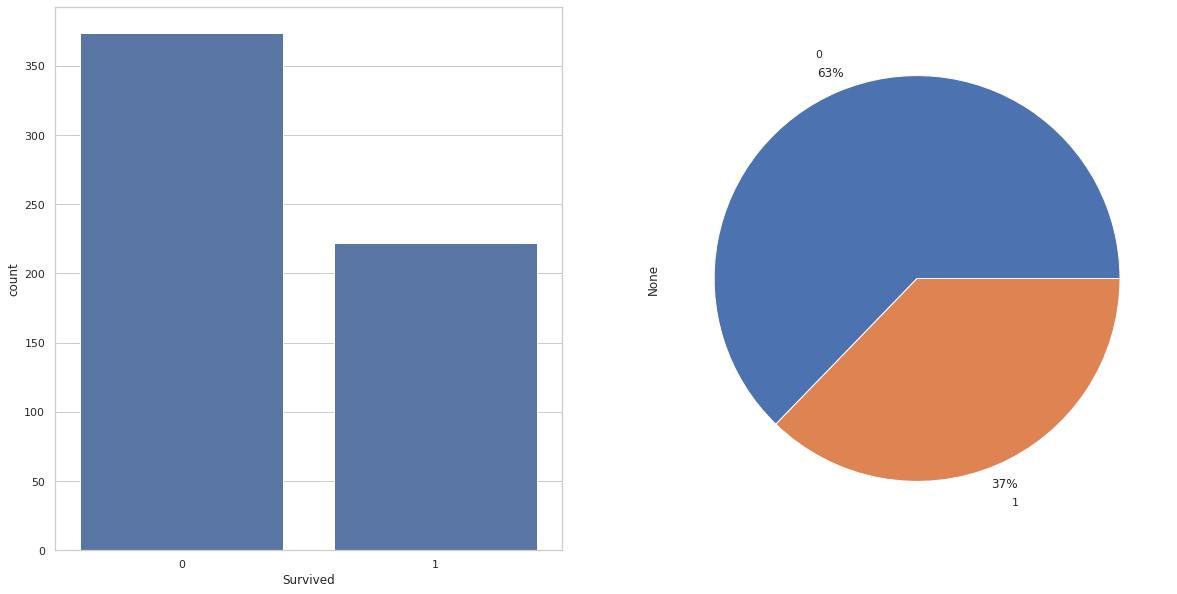

In [39]:
# Comprobamos la distribución de la variable objetivo en el set de train
plot_discret_vars_plots(obj_train, ["Survived"])

Using plot grid of [1] rows and [2] cols


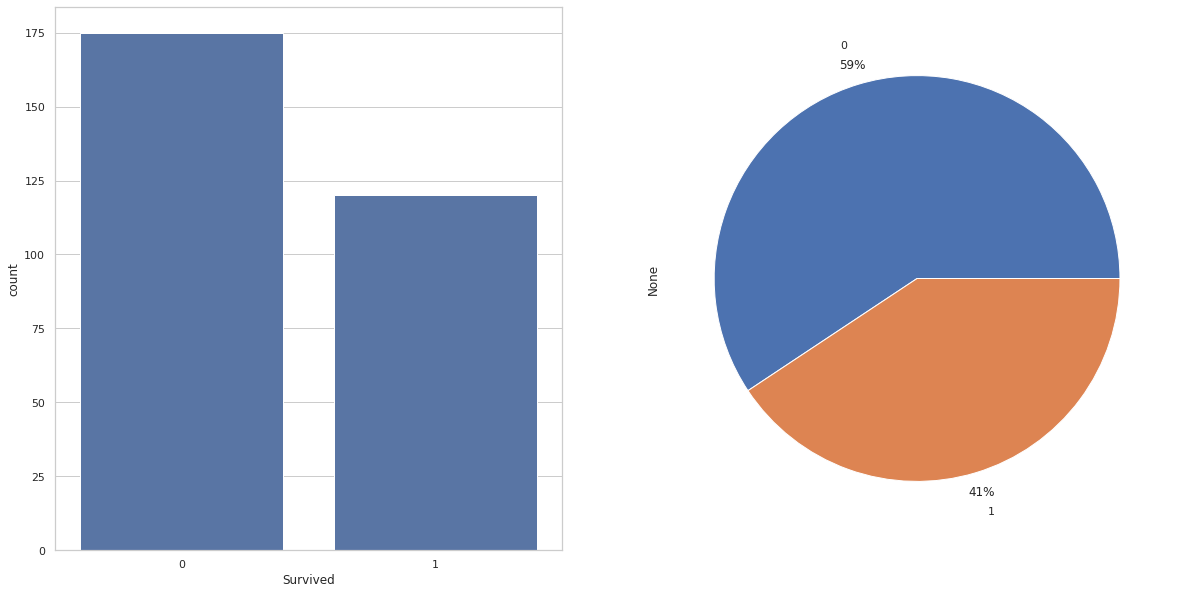

In [40]:
# Comprobamos la distribución de la variable objetivo en el set de train
plot_discret_vars_plots(obj_test, ["Survived"])

### Entrenando el modelo

Ya tenemos los datos divididos y listos para ser usados tanto para entrenar como evaular el modelo. Primero vamos a, por supuesto, entrenar el modelo.

Repetimos la **lista de modelos que queremos usar para solventar el problema que queremos** (predecir si un tripulante sobreviviría el titanic o no):

* **Arbol de decisión**.
* **Random Forest**.

#### Arbol de decisión

Empezamos con el **modelo más simple de la lista**. Además de uno de los **más conocidos**.

Se trata de un modelo **compuesto de dos componentes principales**:
  * **Nodos**: En los cuales se "depositan" las diferentes instancias del dataset a medida que van bajando por el arbol. Cuando **el nodo está al final del árbol, se llama "hoja" y son las que etiquetan los datos con la variable objetivo**.
  * **Ramas**: Por estas viajan las instancias del dataset a medida que atraviesan el arbol de arriba a abajo dependiendo de si cumples la condición que ostentan o no.

Cuando se **contruyen estos árboles**, de arriba a abajo, se **intenta calcular qué variable es la idónea para separar las variables en nodos más homogéneos en cuanto a la variable objetivo**. En nuestro caso intentará separar usando una variable que le permita separar los tripulantes que van a sobrevivir de los que no van a sobrevivir dejándolos lo más apartado posibles. Los árboles de decisión usan para ello una métrica que se llama "*gini*" se puede encontrar información mas detallada en [wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity).

Gracias a su estrucutura es muy **facil de visualizar y comprender** como veremos a continuación.

Vamos a utilizar la implementación de [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de este modelo.

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Creamos el arbol de decisión de cero.
# Decimos que el árbol como mucho puede tener de profundiad 5 pasos.
clf_depth5 = DecisionTreeClassifier(max_depth = 5)

# Entrenamos el modelo con nuestro dataset de entrenamiento:
# -> Variables predictoras de entrenamiento
# -> Variable objetivo de entrenamiento
clf_depth5 = clf_depth5.fit(pred_train, obj_train)

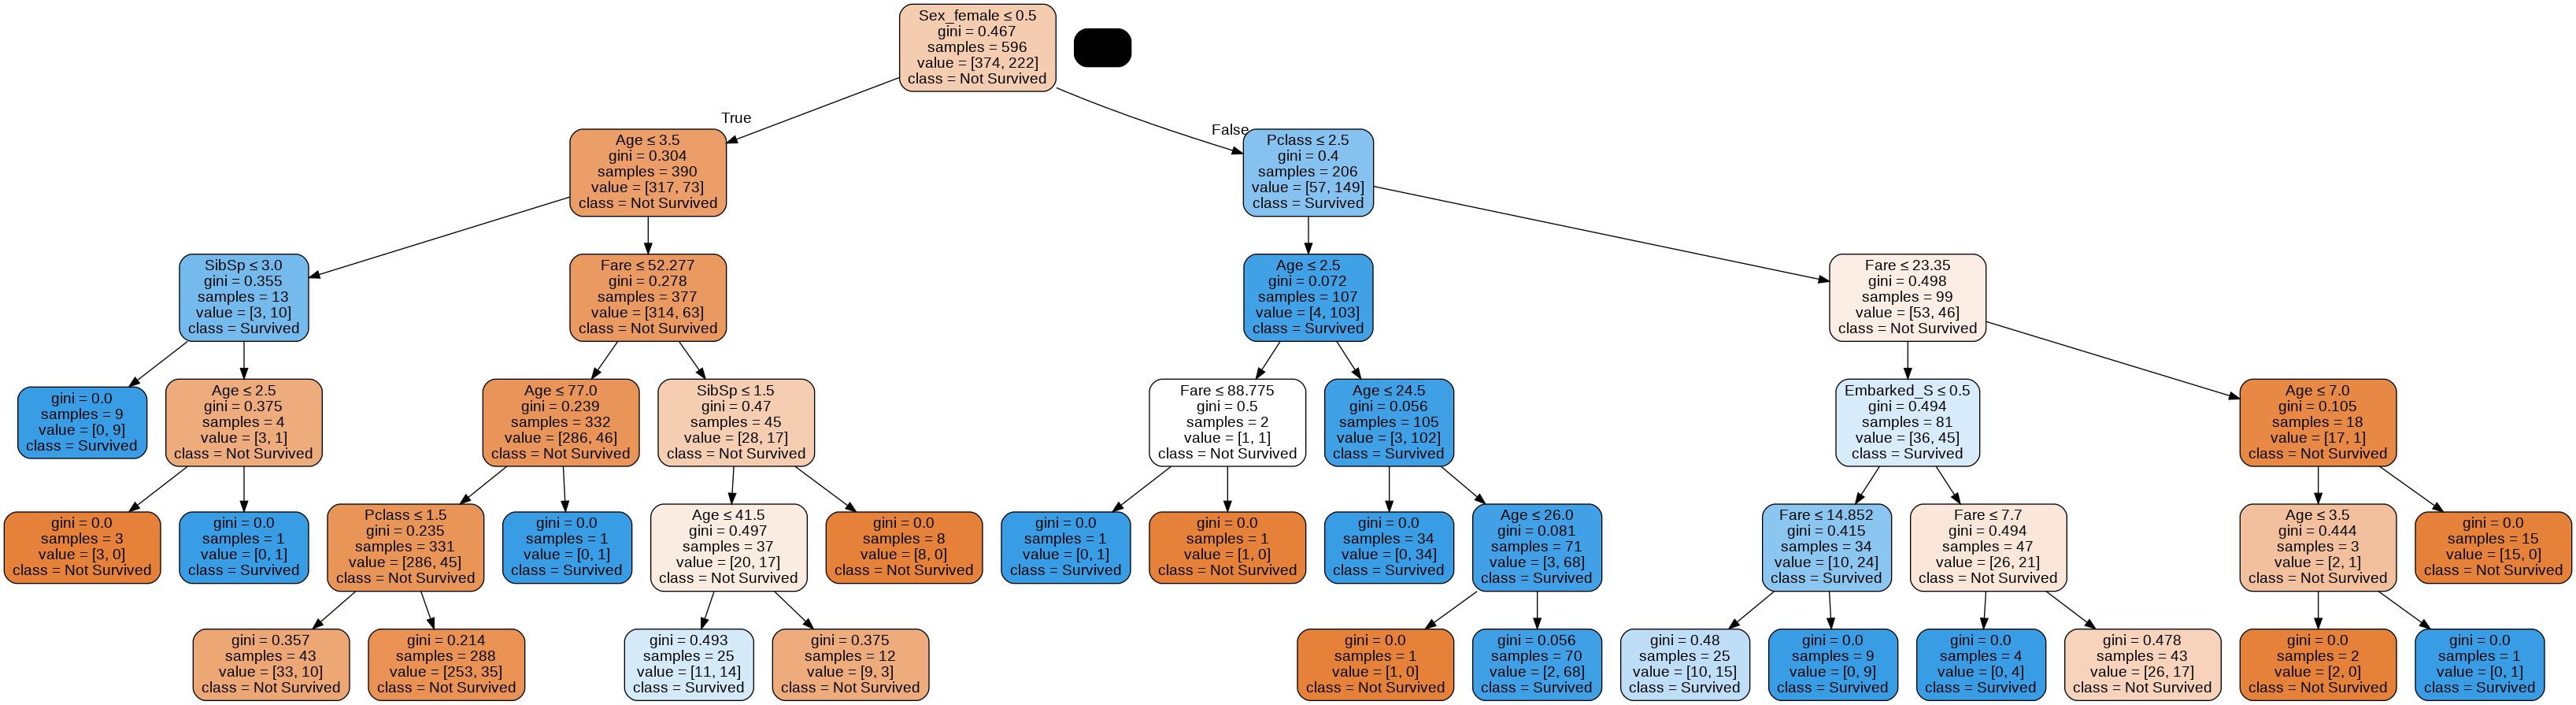

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

def create_survive_class_names(model):
  truthfull_class_names = []
  for value in model.classes_:
    if value == 0:
      truthfull_class_names.append('Not Survived')
    elif value == 1:
      truthfull_class_names.append('Survived')
    
  return truthfull_class_names

export_graphviz(clf_depth5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pred_train.columns, class_names=create_survive_class_names(clf_depth5))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('classif_tree_titanic.png')
Image(graph.create_png())

In [41]:
!wget https://miro.medium.com/max/750/1*fxiTNIgOyvAombPJx5KGeA.png

--2022-06-27 17:31:46--  https://miro.medium.com/max/750/1*fxiTNIgOyvAombPJx5KGeA.png
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35287 (34K) [image/png]
Saving to: ‘1*fxiTNIgOyvAombPJx5KGeA.png’

1*fxiTNIgOyvAombPJx 100%[===================>]  34.46K  --.-KB/s    in 0s      

2022-06-27 17:31:46 (90.5 MB/s) - ‘1*fxiTNIgOyvAombPJx5KGeA.png’ saved [35287/35287]



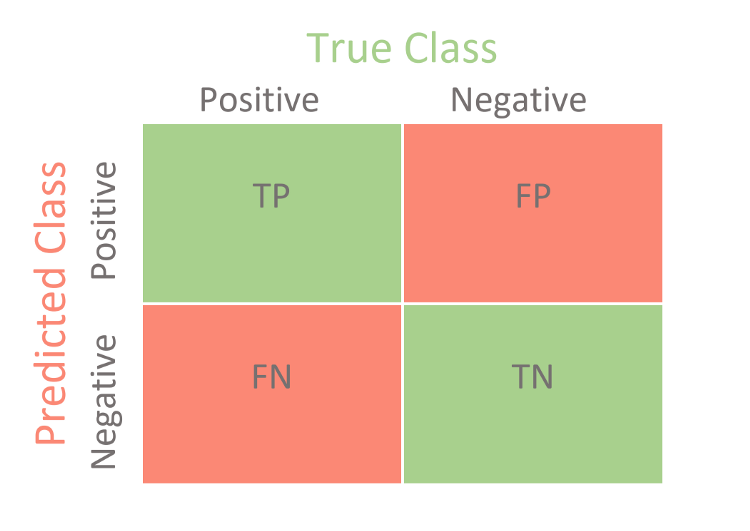

In [42]:
Image(filename= "/content/1*fxiTNIgOyvAombPJx5KGeA.png")

Donde:
* **TP "True positive"**: los valores positivos de la variable han sido predecidos correctamente. (e.g. Se le diagnostica como infectado a alguien que padece covid.)
* **FP "False postive"**: los valores negativos de la variable se etiquetan como positivos. (e.g. Se le diagnostica como infectado a alguien que **no** padece el covid).
* **FN "False negative"**: los valores positivos de la variable se etiquetan como negativos. (e.g. Se le diagnostica como **no** infectado a alguien que padece el el covid).
* **TN "True negative"**: los valores negativos de la variable se etiquetan como negativos. (e.g. Se le diagnostica como **no** infectado a alguien que **no** padece el covid)


También vamos a **calcular la métrica más común para ejercicios de clasificación, "accuracy"** (precisión en español), la cual calcula **cuántas predicciones hemos acertado en relación a todos los casos de prueba**. Más formalmente:

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

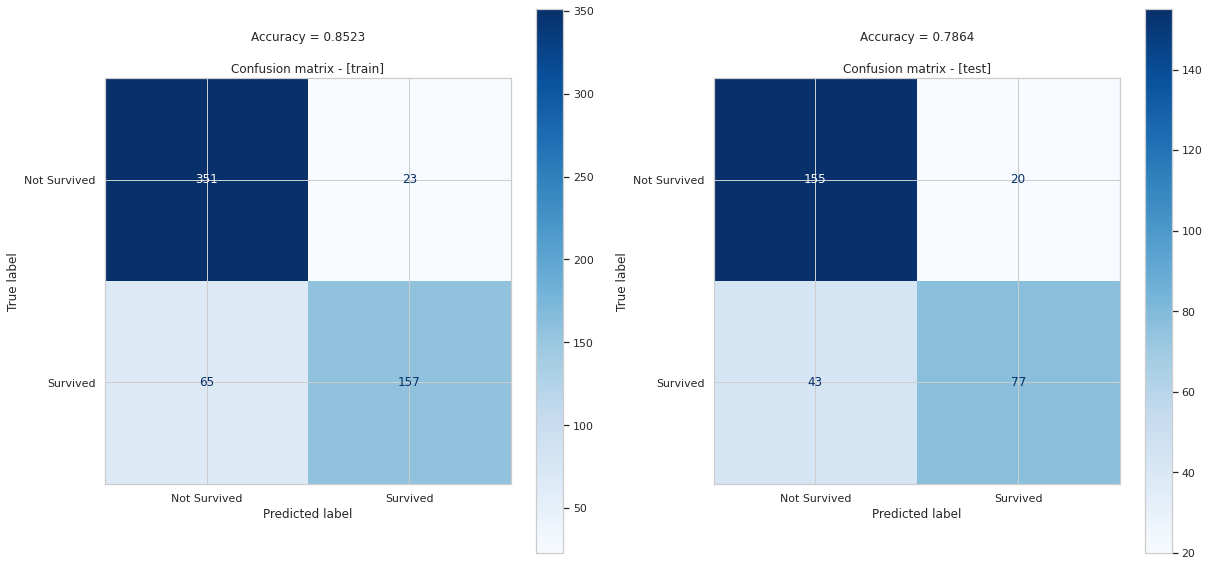

In [45]:
def plot_confussion_matrix_trts(model, pred_train, obj_train, pred_test, obj_test):
  from sklearn.metrics import ConfusionMatrixDisplay
  import matplotlib.pyplot as plt
  from sklearn.metrics import accuracy_score
  # Plot non-normalized confusion matrix
  fig, axs = plt.subplots(nrows = 1, ncols = 2)
  
  fig.set_figheight(10)
  fig.set_figwidth(20)
  for pred_set, obj_set, current_set, ax in zip([pred_train, pred_test], [obj_train, obj_test], ['train', 'test'], axs.flatten()):
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        pred_set,
        obj_set,
        display_labels=create_survive_class_names(model),
        cmap=plt.cm.Blues,
        normalize=None,
        ax = ax
    )

    obj_predicted = model.predict(pred_set)

    ax.set_title("Confusion matrix - [{0}]".format(current_set))
    accuracy = round(accuracy_score(obj_set, obj_predicted, normalize=True), 4)
    ax.text(0.5, 1.1, 'Accuracy = {0}'.format(accuracy), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

plot_confussion_matrix_trts(clf_depth5, pred_train, obj_train, pred_test, obj_test)

#### Random Forest

Se trata de un **"ensemble model"**, esto queire decir que es un **modelo compuesto por otros modelos más simples y menos potentes**. En este caso Random Forest está **compuesto por diferentes árboles de decisión**, tal y como lo hemos visto en el ejemplo anterior, que se **entrenan con diferentes subsets del dataset de entrenamiento original**.

Todos los árboles de decisión predicen el valor de la variable o variables objetivo y la mayoritaria es la que se usa para etiquetar la instancia.

En este caso vamos a usar la implementación de [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) de este modelo.

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Creating the random forest model
# -> n_estimators: número de árboles de decisión que usará el modelo
# -> max_depth: igual que en el ejemplo anterior, estipula la profundiad máxima de los árboles de decisión que componen el modelo
# En este caso vamos a mantener la profundidad máximo del caso anterior para evitar overfitting
# -> random_state: Ya que el modelo se entrena con subsets de datos generados aleatoriamente, esto fuerza a que siempre que se ejecute el modelo
# con el mismo random state, el resultado será el mismo.
rf = RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state = 42)

#Entrenamos el modelo
rf = rf.fit(pred_train, obj_train.values.ravel())

Dado que el modelo está compuesto por muchos árboles de decisión, **no podemos visualizarlos todos**, pero podemos elegir visualizar alguno de ellos.

En este caso vamos a **visualizar el tercer árbol creado dentro del Random Forest entrenado**.

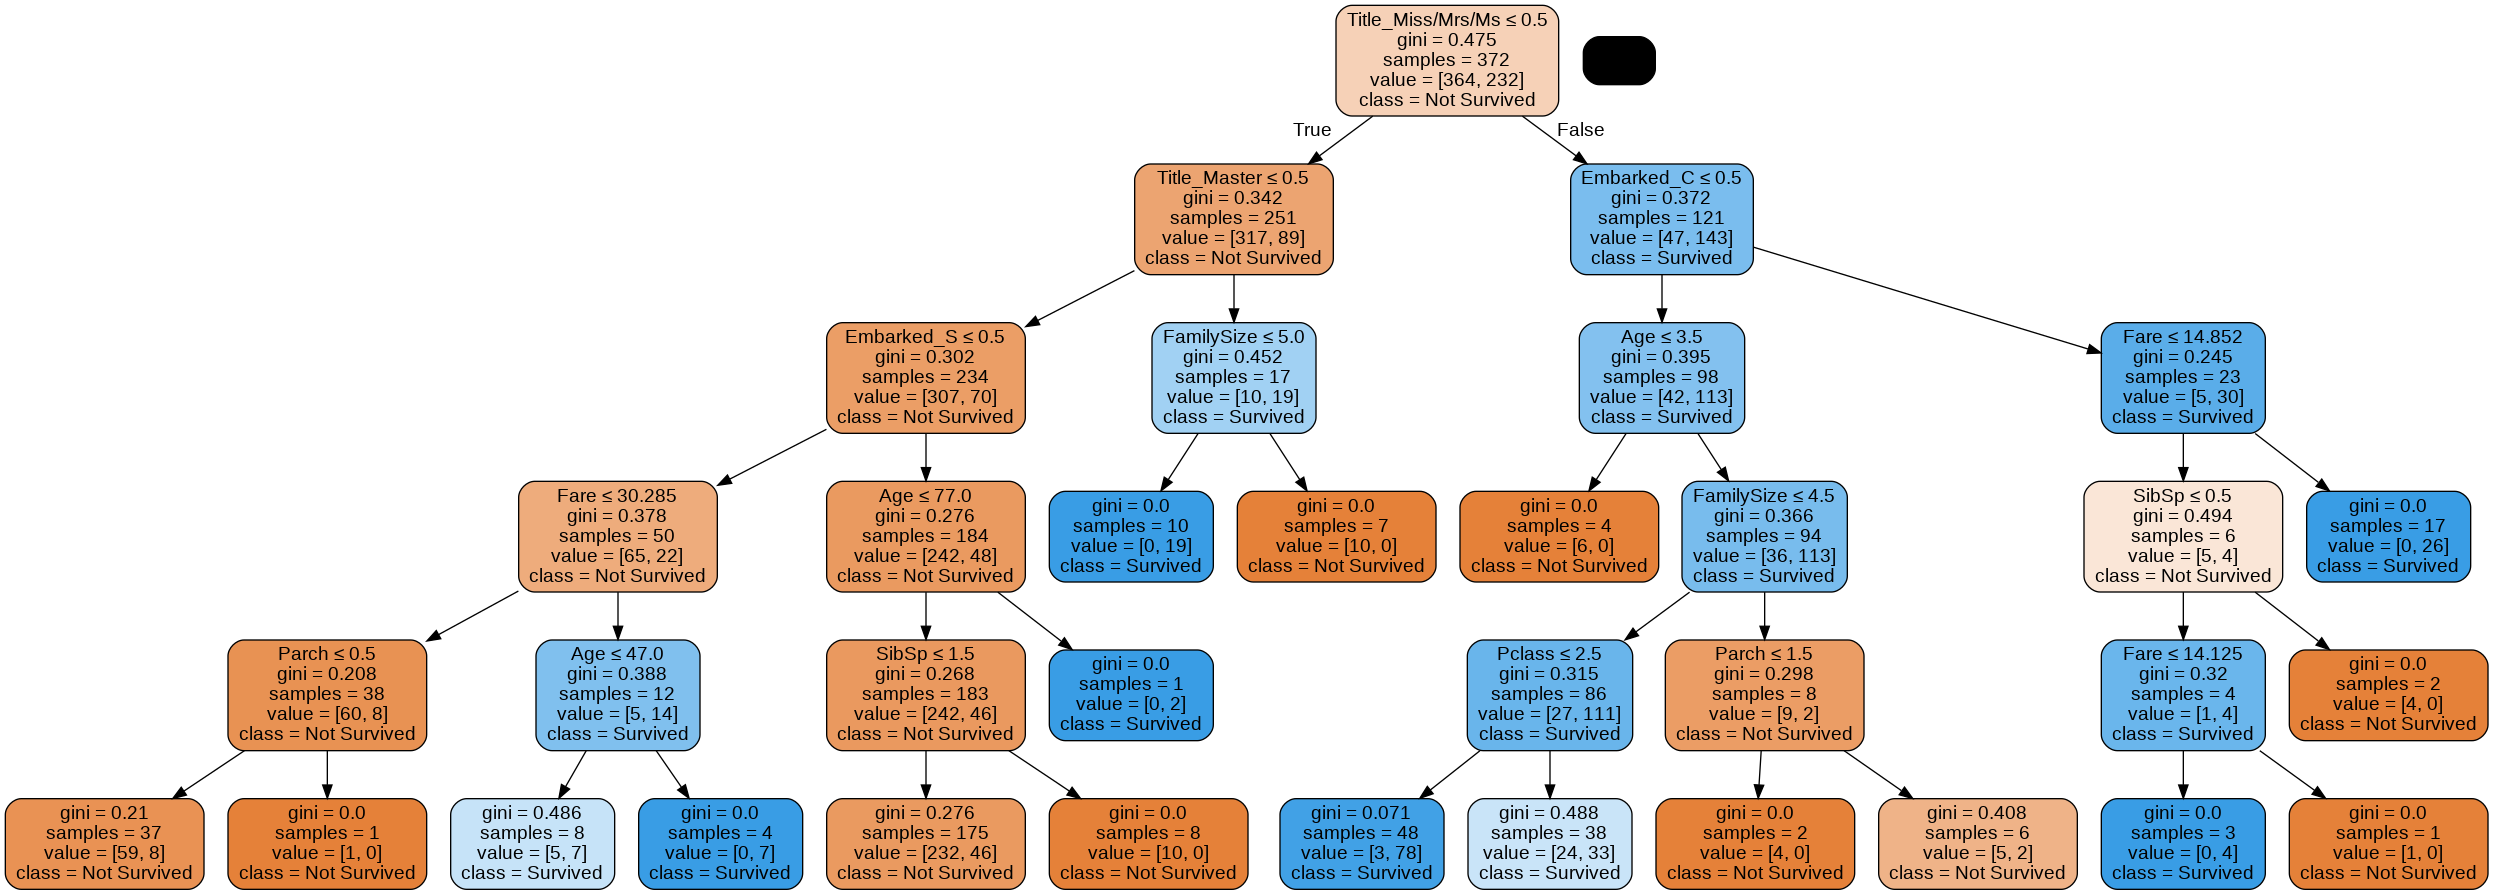

In [47]:
decision_tree_selected = rf.estimators_[2]

dot_data = StringIO()
export_graphviz(decision_tree_selected, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = pred_train.columns, class_names = create_survive_class_names(decision_tree_selected))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('classif_tree_titanic.png')
Image(graph.create_png())

Vamos a comprobar los resultados del modelo tanto en el test de entrenamiento como en el de prueba.

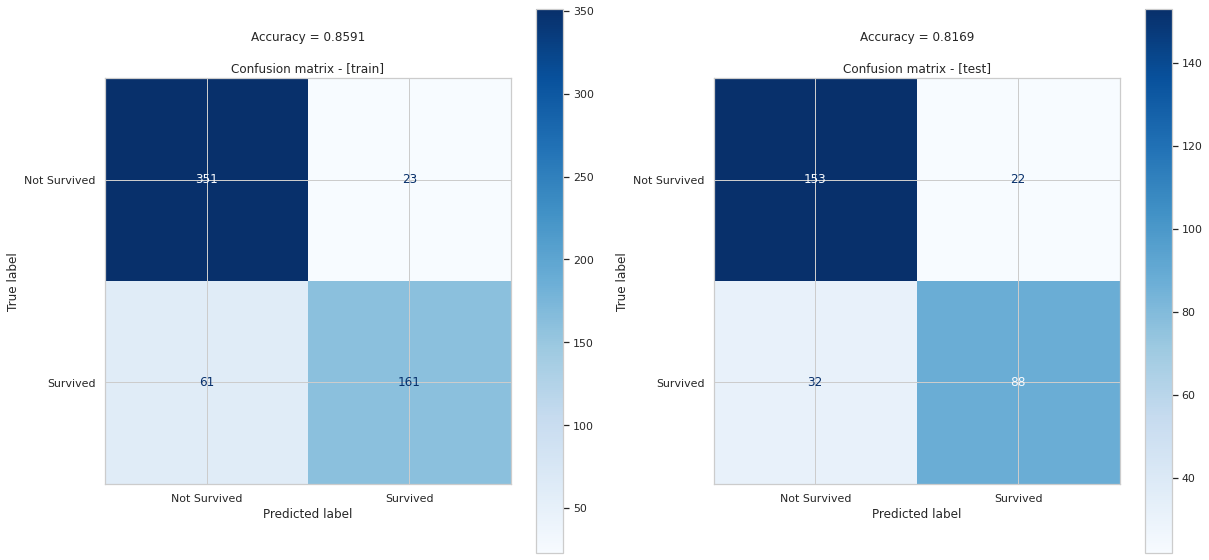

In [48]:
plot_confussion_matrix_trts(rf, pred_train, obj_train, pred_test, obj_test)

Este modelo recoge **mejores resultados en el set de test**. Es por esto que el modelo Random Forest es muy usado para resolver problemas predictivos, la combinación de bastantes árboles de decisión suele obtener mejores resultados que usar solamente uno.

Una **peculiaridad** de este modelo es que, al estar compuesto de árboles de decisión, **cada uno predice la etiqueta de una instancia dada**. Esto hace que se **pueda estimar una pseudoprobabilidad haciendo referencia a si el etiquetado del modelo fue**:

* **Probabilidades extremas (cerca de 1 o 0)**: En este caso la mayoría de los árboles vota por la misma etiqueta para la instancia.

* **Probabilidades uniformes (cerca de 1/número de etiquetas posibles)**: En este caso no existe un buen consenso entre los árboles de decisión el modelo no etiqueta la instancia con certeza.


Veamos un ejemplo con el set de test:

In [50]:
test_con_probabilidades = pred_test.copy()
test_con_probabilidades[['Not Survived PROB', 'Survived PROB']] = rf.predict_proba(pred_test)
test_con_probabilidades['Survived REAL'] = obj_test
test_con_probabilidades

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr,Not Survived PROB,Survived PROB,Survived REAL
709,3,29.0,1,1,15.2458,3,1,0,0,0,1,0,1,0,0,0.322266,0.677734,1
439,2,31.0,0,0,10.5000,1,0,0,1,0,1,0,0,0,1,0.829898,0.170102,0
840,3,20.0,0,0,7.9250,1,0,0,1,0,1,0,0,0,1,0.884481,0.115519,0
720,2,6.0,0,1,33.0000,2,0,0,1,1,0,0,0,1,0,0.144591,0.855409,1
39,3,14.0,1,0,11.2417,2,1,0,0,1,0,0,0,1,0,0.349321,0.650679,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,19.0,0,0,7.6500,1,0,0,1,0,1,0,0,0,1,0.889851,0.110149,0
525,3,40.5,0,0,7.7500,1,0,1,0,0,1,0,0,0,1,0.889732,0.110268,0
381,3,1.0,0,2,15.7417,3,1,0,0,1,0,0,0,1,0,0.145593,0.854407,1
140,3,29.0,0,2,15.2458,3,1,0,0,1,0,0,0,1,0,0.191043,0.808957,0


### Usando el mejor modelo

De los modelos entrenados, Random Forest ha sido el que mejores resultados ha dado.

Una vez el modelo está entrenado puede ser utilizado para predecir el valor o valores de la variable objetivo para nuevas instancias.

En nuestro caso, vamos a **intentar predecir si un nuevo tripulante sobreviviría en el titanic en caso de haber estado ahí**.

En el método que se implementa a continuación es posible seleccionar el modelo que se queire usar así como crear el perfil de tripulante que se quiera. El método **devuelve no solo la predicción de supervencia del nuevo tripulante (0 si perece, 1 si sobrevive) si no que también extraemos las probabilidades de los modelos para saber cómo de seguro está el modelo de la predicción dada**.

In [51]:
!pip install shap -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [54]:
class Passenger():
  def __init__(self, Pclass, Age, Sex, SibSp, Parch, Title, Fare, Embarked):
    self.Pclass = Pclass
    self.Age = Age
    self.Sex = Sex
    self.SibSp = SibSp
    self.Parch = Parch
    self.Title = Title
    self.Fare = Fare
    self.Embarked = Embarked
    

def predict_survival_from_model(model, passenger):
  def assign_title_value(title):
    resulting_array = None
    if title in ['Dr', 'Military', 'Noble', 'Clergy']:
      resulting_array = [1, 0, 0, 0]
    elif title == 'Master':
      resulting_array = [0, 1, 0, 0]
    elif title in ['Miss', 'Mrs', 'Ms']:
      resulting_array = [0, 0, 1, 0]
    elif title == 'Mr':
      resulting_array = [0, 0, 0, 1]
    else:
      raise Exception('Title [{0}] not supported in the model'.format(title))

    return resulting_array

  def assign_emarked_value(embarked):
    resulting_array = None
    if embarked == 'C':
      resulting_array = [1, 0, 0]
    elif embarked == 'Q':
      resulting_array = [0, 1, 0]
    elif embarked == 'S':
      resulting_array = [0, 0, 1]
    else:
      raise Exception('Embarked [{0}] not supported in the model'.format(embarked))

    return resulting_array

  def assign_sex_value(sex):
    resulting_array = None
    if sex == 'female':
      resulting_array = [1, 0]
    elif sex == 'male':
      resulting_array = [0, 1]
    else:
      raise Exception('Sex [{0}] not supported in the model'.format(sex))

    return resulting_array

  data = pd.DataFrame([[passenger.Pclass, passenger.Age, passenger.SibSp, passenger.Parch, passenger.Fare]],
                        columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

  data['FamilySize'] = data.apply(lambda row: row['SibSp'] + row['Parch'] + 1, axis = 1)
  data[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = assign_emarked_value(passenger.Embarked)
  data[['Sex_female', 'Sex_male']] = assign_sex_value(passenger.Sex)
  data[['Title_Dr/Military/Noble/Clergy', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr']] = assign_title_value(passenger.Title)

  data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_C' ,'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title_Dr/Military/Noble/Clergy', 'Title_Master', 'Title_Miss/Mrs/Ms', 'Title_Mr']]

  data_with_preds = data.copy()
  data_with_preds[['Not Survived PROB', 'Survived PROB']] = model.predict_proba(data_with_preds)
  data_with_preds['Survived'] = model.predict(data_with_preds.drop(columns=['Not Survived PROB', 'Survived PROB']))

  import shap
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(data)
  shap_force_plot = shap.force_plot(explainer.expected_value[1], shap_values.values[0][:,1], data)
  return data_with_preds, shap_force_plot

def get_shap_summary_from_model(model, train_data):
  import shap
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(train_data)
  return shap.summary_plot(shap_values[:, :, 1])


In [60]:
selected_model = rf

data_with_pred, shap_plot = predict_survival_from_model(selected_model,
                          Passenger(Pclass = 1, Age = 25, Sex = 'male', SibSp = 1, Parch = 1, Title = 'Mr', Fare = 320, Embarked = 'S'))
data_with_pred

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Dr/Military/Noble/Clergy,Title_Master,Title_Miss/Mrs/Ms,Title_Mr,Not Survived PROB,Survived PROB,Survived
0,1,25,1,1,320,3,0,0,1,0,1,0,0,0,1,0.722138,0.277862,0


También podemos ver cómo el valor de cada variable introducida ha afectado la decisión del modelo. 

Para ello vamos a usar un método basado en la tería del juego "[Shapley values](https://en.wikipedia.org/wiki/Shapley_value)". Lo que busca este método es, de manera empírica, explicar cómo cada variable ha influenciado en la decisión del modelo.

In [61]:
import shap
shap.initjs()
shap_plot

También podemos visualizar como ha afectado cada variable con todos los casos del set de entrenamiento del modelo dado.

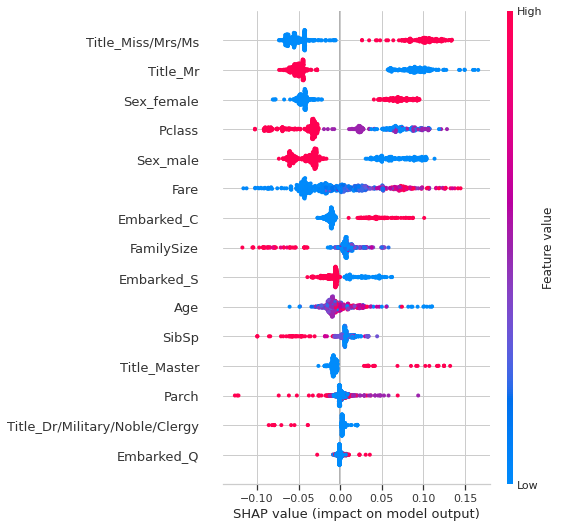

In [62]:
get_shap_summary_from_model(selected_model, pred_train)